In [3]:
#Lets check for duplicates 
data.duplicated().sum()

2

In [5]:
#Lets check for null/nan/missing values in the data 
data.isnull().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [6]:
data.shape

(17415, 13)

 So only 2 columns education and previous_yr_rating are having missing values (few in number)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from itertools import combinations
from itertools import product
from scipy.stats import chi2_contingency

employee_id              17414
department                   9
region                      34
education                    3
gender                       2
recruitment_channel          3
no_of_trainings              9
age                         41
previous_year_rating         5
length_of_service           34
KPIs_met_more_than_80        2
awards_won                   2
avg_training_score          61
dtype: int64

In [ ]:
data.nunique()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17415 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17415 non-null  int64  
 1   department             17415 non-null  object 
 2   region                 17415 non-null  object 
 3   education              16644 non-null  object 
 4   gender                 17415 non-null  object 
 5   recruitment_channel    17415 non-null  object 
 6   no_of_trainings        17415 non-null  int64  
 7   age                    17415 non-null  int64  
 8   previous_year_rating   16052 non-null  float64
 9   length_of_service      17415 non-null  int64  
 10  KPIs_met_more_than_80  17415 non-null  int64  
 11  awards_won             17415 non-null  int64  
 12  avg_training_score     17415 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.9+ MB


In [9]:
data.describe() # prints the statistics of the numerical columns in the data

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17415.000000,17415.000000,17415.000000,16052.000000,17415.000000,17415.000000,17415.000000,17415.000000
mean,39082.285214,1.250761,34.807982,3.345751,5.801493,0.358886,0.023371,63.177720
std,22708.049139,0.595720,7.694464,1.265194,4.175632,0.479687,0.151082,13.418314
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19280.500000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39115.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


# UNIVARIATE Analysis

In [10]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [11]:
num_cols = [col for col in data.columns if data[col].dtypes=="int64" or  data[col].dtypes=="float64"]
num_cols

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met_more_than_80',
 'awards_won',
 'avg_training_score']

## Numerical Columns Analysis

1] no_of_trainings

In [12]:
data["no_of_trainings"].value_counts()

no_of_trainings
1    14059
2     2628
3      539
4      137
5       26
6       16
7        6
8        2
9        2
Name: count, dtype: int64

We can see discrete bars due to the fact that no_of_trainings has only 9 discrete unique values 

Inference : Most of the employee have only 1 or 2 training session with a maximum of 9

2] AGE

<Axes: xlabel='age', ylabel='Count'>

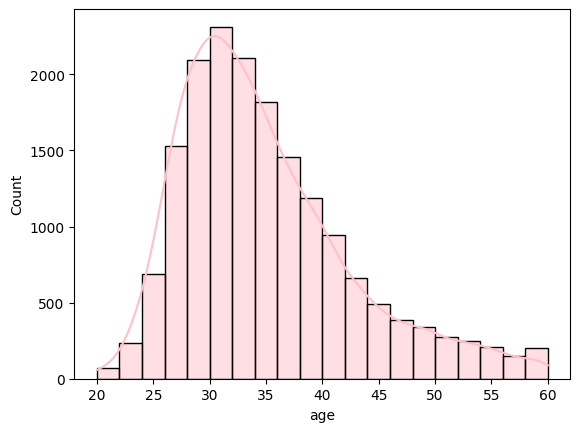

In [14]:
sns.histplot(data=data,x="age",bins=20,color="pink",kde=True)

We can see that most of the employees are youth, with few being aged.  
We have a peak around 30 years age which is quite logical in most of the companies to have young employees with a little work experience

3] length_of_service

<Axes: xlabel='length_of_service', ylabel='Count'>

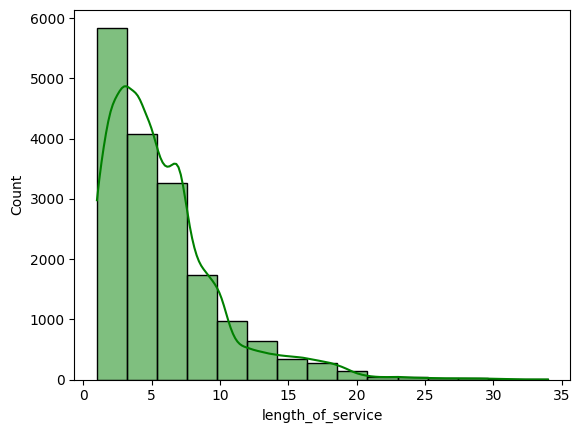

In [15]:
sns.histplot(data=data,x="length_of_service",bins=15,color="green",kde=True)

We can see that most of the employees are dont have very less large length_of_service with their previous employer as the kde is highly right skewed

4] KPIs_met_more_than_80

In [16]:
data.KPIs_met_more_than_80.unique()

array([1, 0], dtype=int64)

C:\Users\user\AppData\Local\Temp\ipykernel_1108\494431423.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="KPIs_met_more_than_80",palette=["red","green"])


<Axes: xlabel='KPIs_met_more_than_80', ylabel='count'>

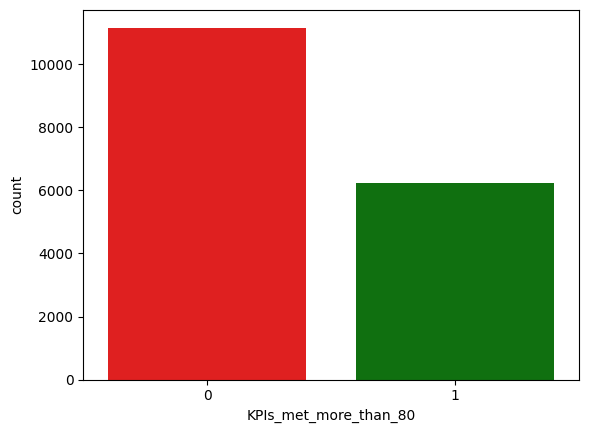

In [17]:
sns.countplot(data=data,x="KPIs_met_more_than_80",palette=["red","green"])

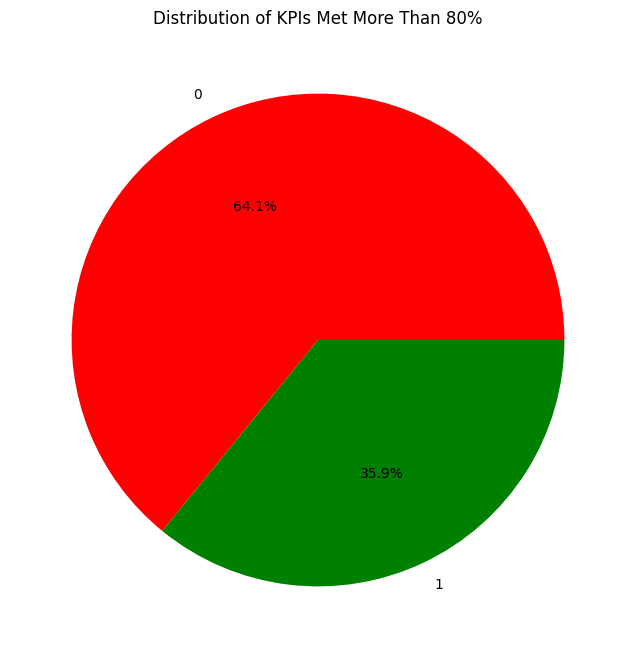

In [18]:
counts = data["KPIs_met_more_than_80"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["red", "green"])
plt.title('Distribution of KPIs Met More Than 80%')
plt.show()

We can see that 64% of the employees havent achieved Key Performance Indicators which is a concern for the company managers.  
They have to work on improving this %age upto 70% and even more for growth of the company

5] AWARDS WON

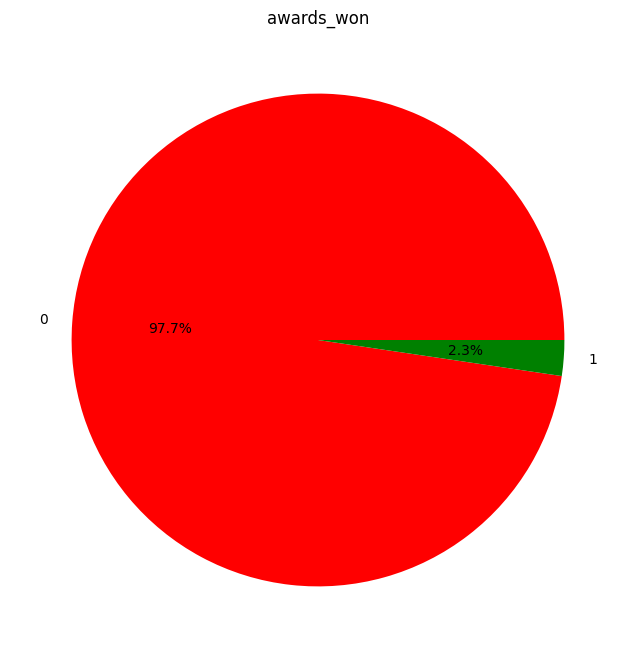

In [19]:
counts = data["awards_won"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["red", "green"])
plt.title('awards_won')
plt.show()

Only 2.3% of the employees have won the award which is quite logical that award is given by the company to only few cream employees for there excelent performance

6] avg_training_score

<Axes: xlabel='avg_training_score', ylabel='Count'>

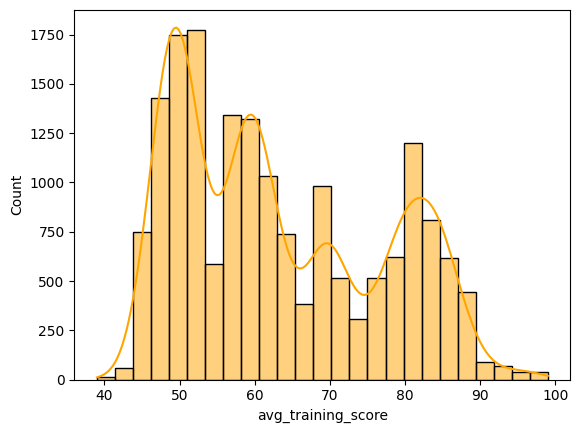

In [20]:
sns.histplot(data=data,x="avg_training_score",bins=25,kde=True,color="orange")

We can see a wide variation in the avg_training_score range.  Less employees have scored above 80

7] previous_year_rating

<Axes: xlabel='previous_year_rating', ylabel='count'>

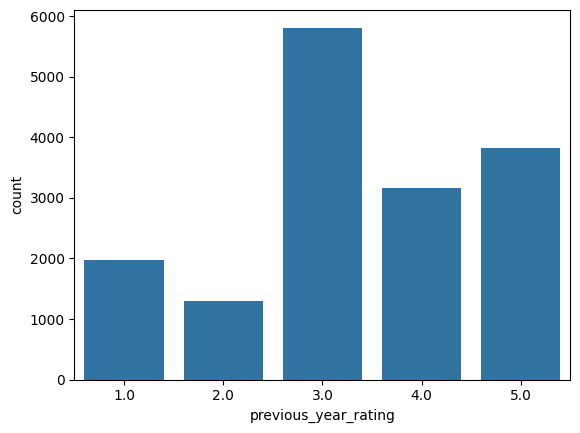

In [21]:
sns.countplot(data=data,x="previous_year_rating")

## Categorical Column Analysis

In [22]:
cat_cols = [col for col in data.columns if data[col].dtypes=="object"]
cat_cols

['department', 'region', 'education', 'gender', 'recruitment_channel']

1] Department

In [23]:
data.department.value_counts()

department
Sales & Marketing    5458
Operations           3524
Procurement          2240
Technology           2199
Analytics            1697
HR                    831
Finance               802
Legal                 332
R&D                   332
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='department'>

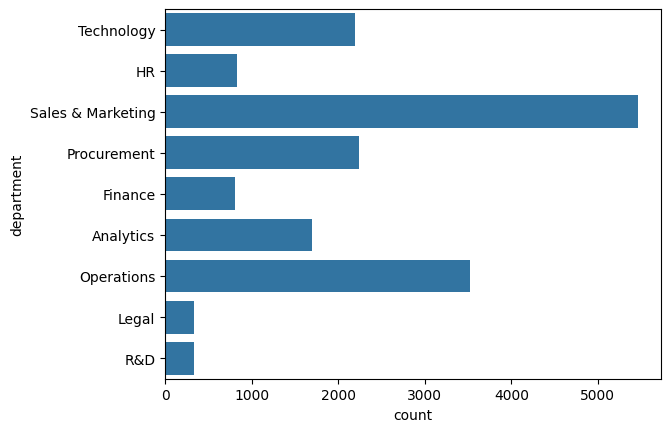

In [24]:
sns.countplot(data=data,y="department")

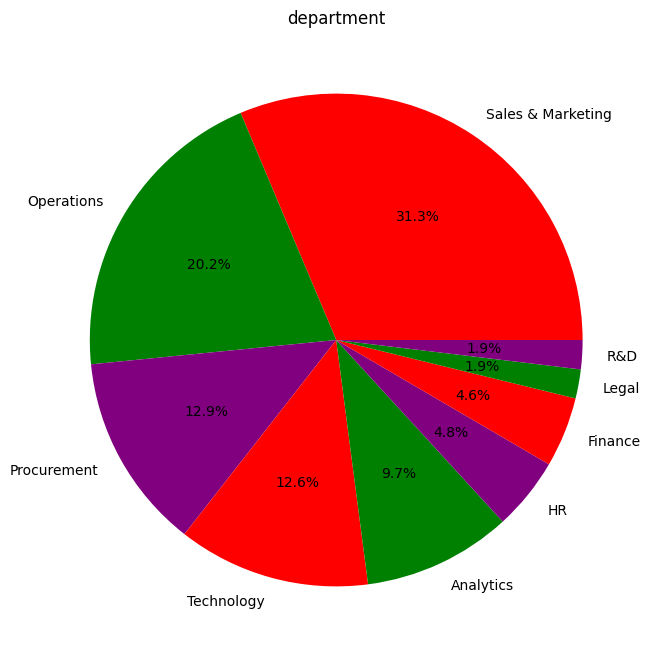

In [25]:
counts = data["department"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["red", "green","purple"])
plt.title('department')
plt.show()

Operations and Sales&Marketing covers half of company employees with very few in R&D, Legal, Finance etc

4] recruitment_channel

<Axes: xlabel='education', ylabel='count'>

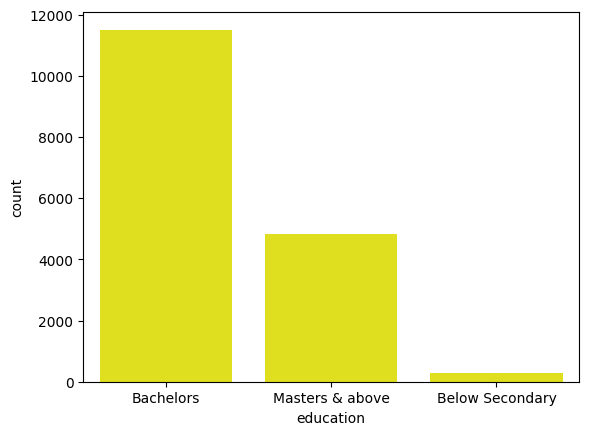

In [26]:
sns.countplot(data=data,x="education",color="yellow")

Max employees are decently educated, few being highly educated, very less being less educated

3] Gender

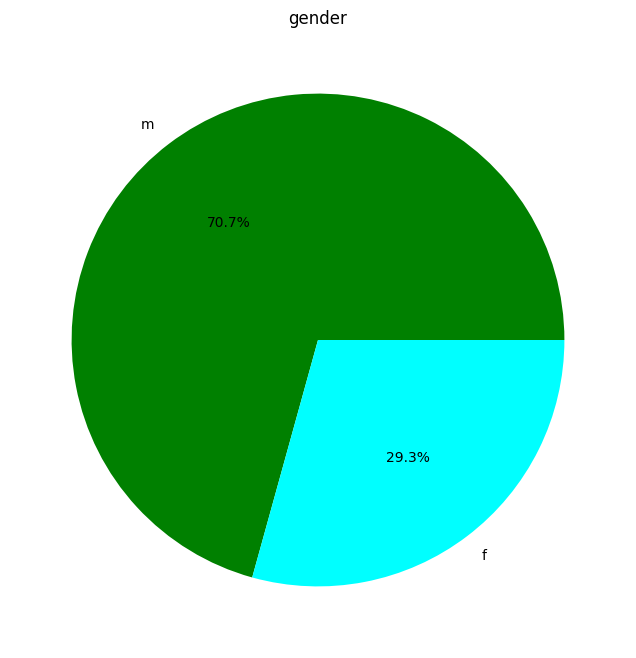

In [27]:
counts = data["gender"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["green", "cyan"])
plt.title('gender')
plt.show()

More than 70% employees in the company are male

2] Education

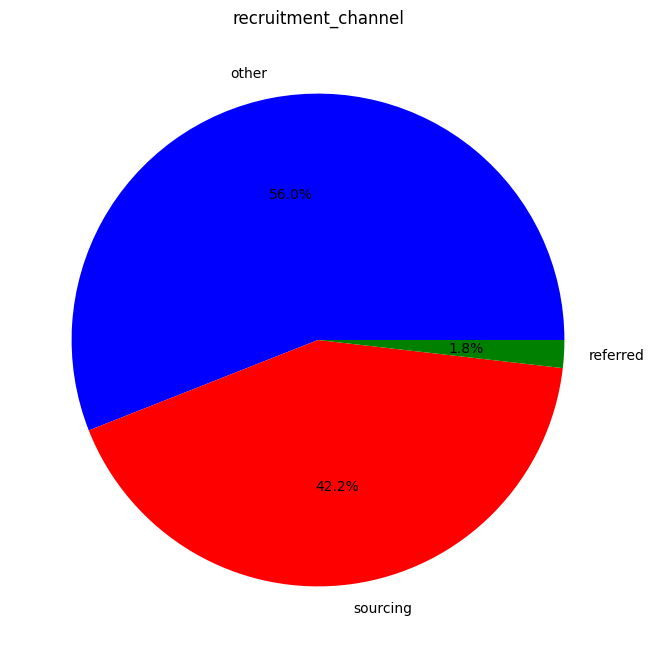

In [28]:
counts = data["recruitment_channel"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["blue", "red","green"])
plt.title('recruitment_channel')
plt.show()

5] Region

<Axes: xlabel='count', ylabel='region'>

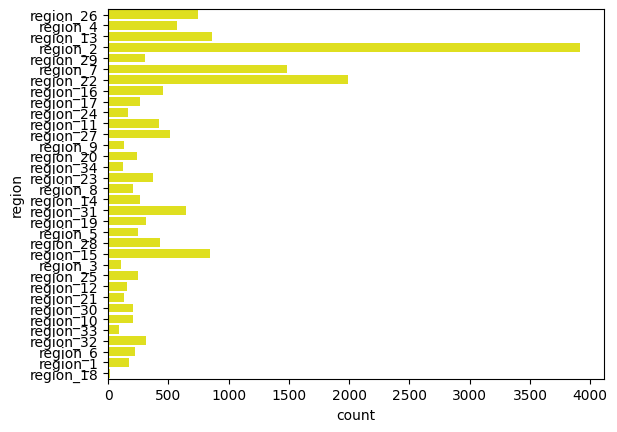

In [29]:
sns.countplot(data=data,y="region",color="yellow")

Max employees belong to region2, while remaining approx evenly spread in rest locations

## Here we have completed analysis of indivisual column, based on this lets fill the null values in the dataset

Based on the analysis of previous_year_rating, i think its better to fill nan values using meadian (which is also the mode)

For the education column lets use the mode (graduate) as its categorical data mean, meadin doesnt make sense and also graduate class is largely dominant over the other two

# Now we have a completed the missing value imputation part

# BIVARIATE ANALYSIS

# 1] Numerical and Numerical

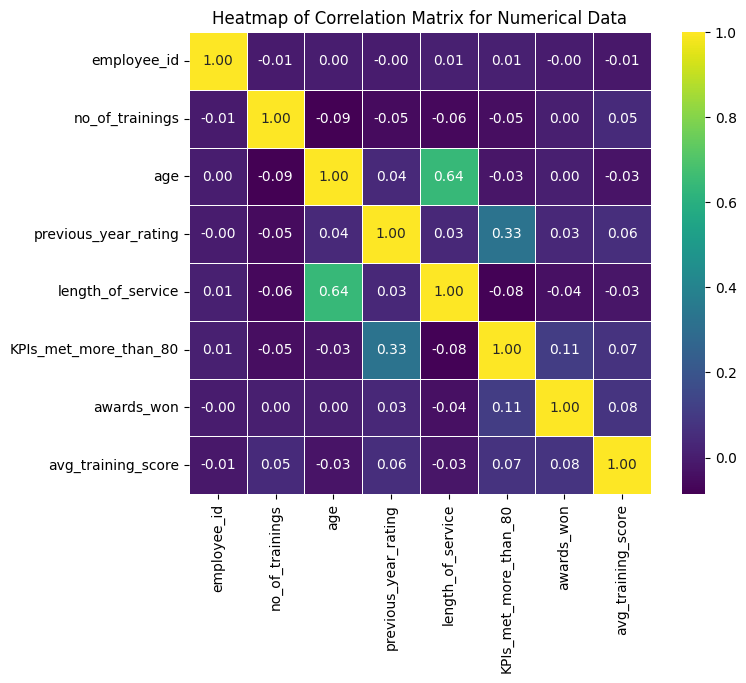

In [33]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar=True, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for Numerical Data')
plt.show()

From the heatmap of correlation matrix we can see that ther isnt much linear relationship between the maximum numerical columns

Two things that can be infered are  
1] length of service is quite well correlated with age which is quite logical as person with less age cant be expected to have large experience.  
2] KPI more than 80 is little related with the prev_yr_rating.

## 2] Categorical and categorical

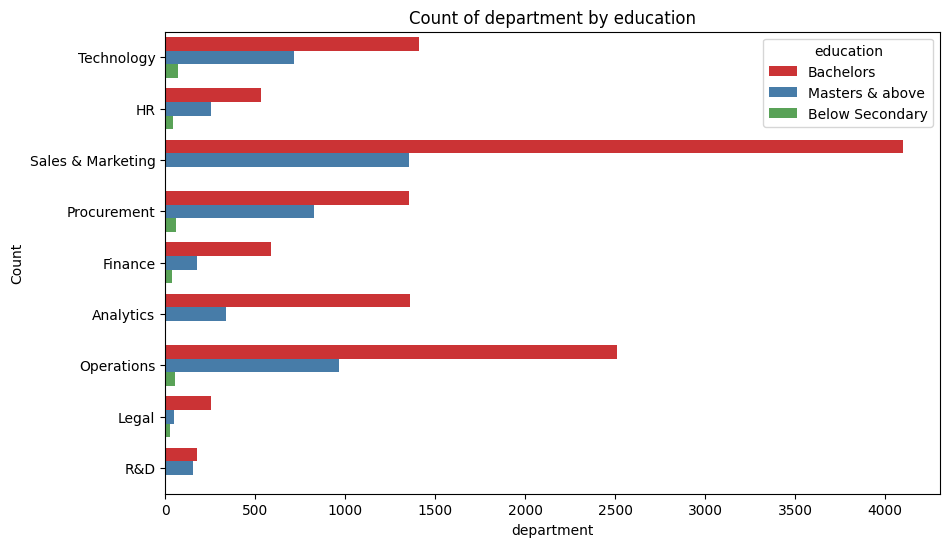

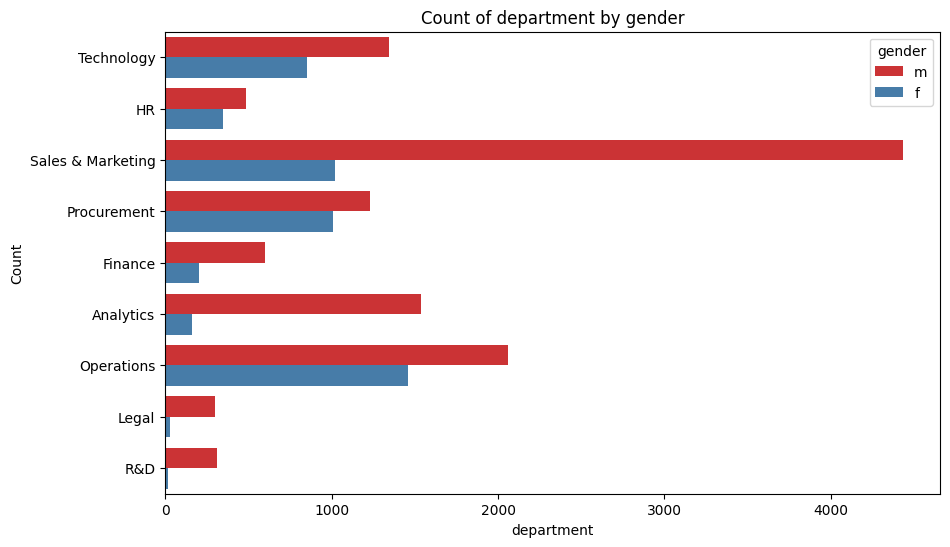

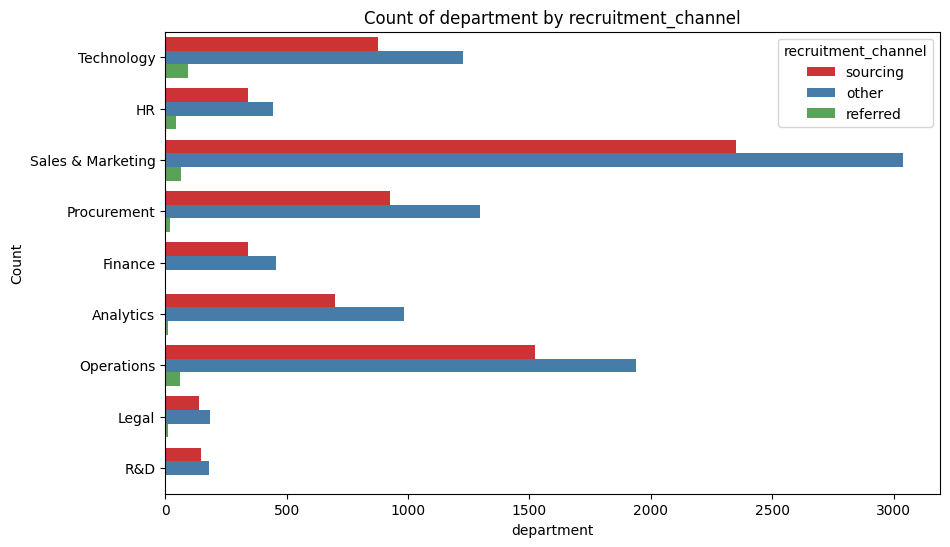

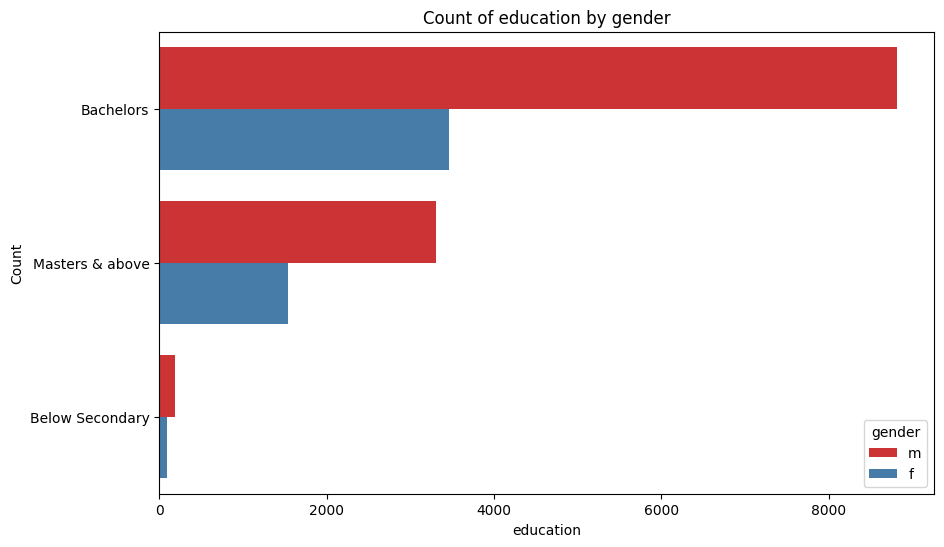

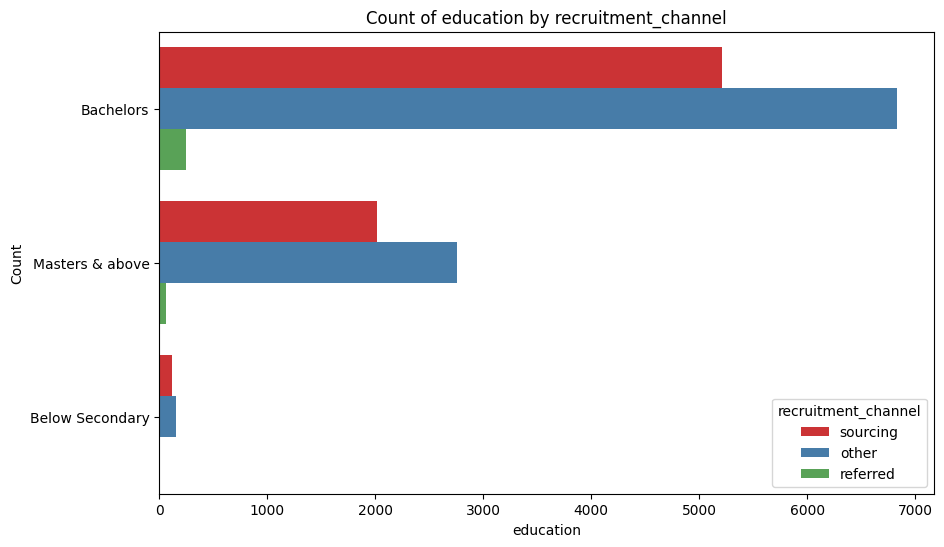

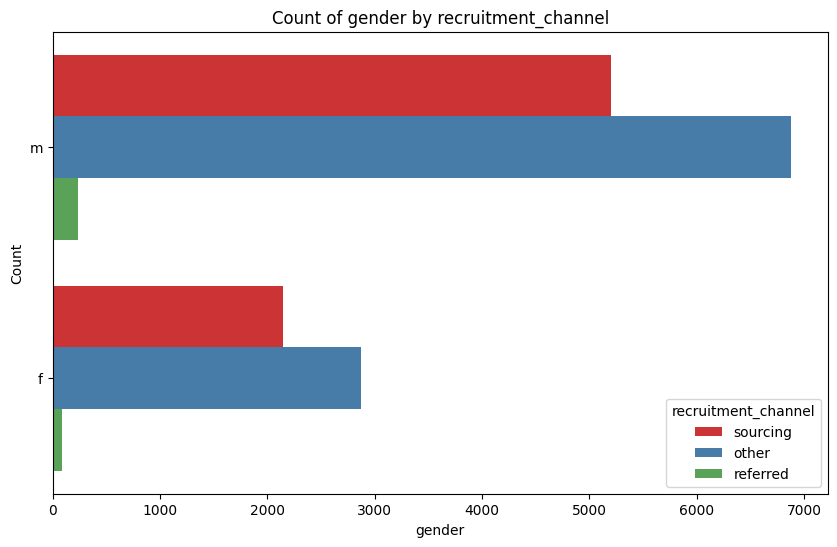

In [34]:
# lets not plot for region as its giving very dirty graphs which cant be used to infer anything
cat_col = cat_cols.copy()
cat_col.remove("region")
for col1, col2 in combinations(cat_col, 2):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, y=col1, hue=col2, palette='Set1')
    plt.title(f'Count of {col1} by {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.legend(title=col2)
    plt.show()

We have plotted count plots for various combinations of categorical columns

high p-value implies there is no association between the two categorical data¶

So from the above result we can say the following things:
1] department and region, department and education, department and gender, department and recruitment_channel have a relationship between them
ie. department is dependent on all these factors 2] region is also dependent on all other cat factors education, gender, department, recruitment_channel
3] only indepedent pair from the observation is gender and recruitment channel

## 3] Numerical and Categorical

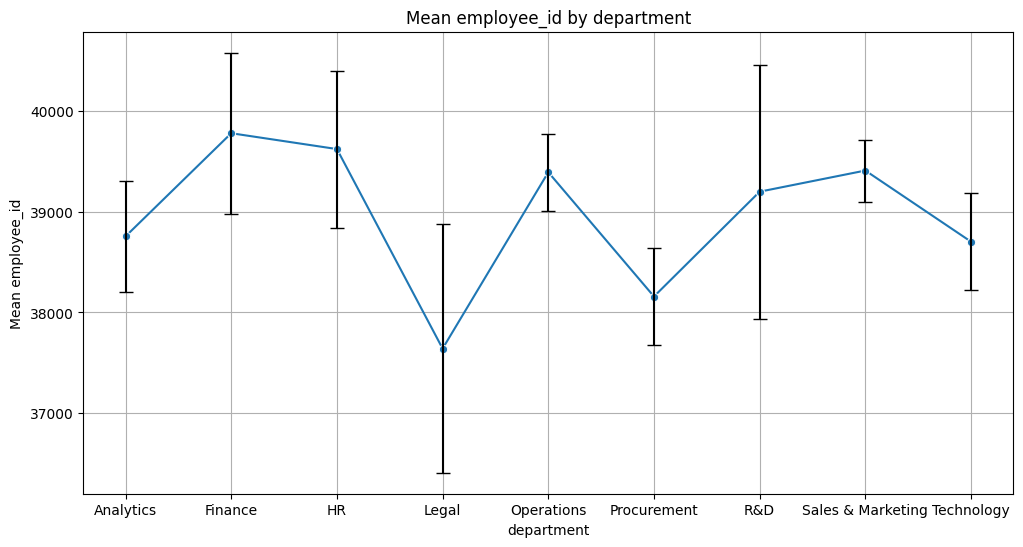

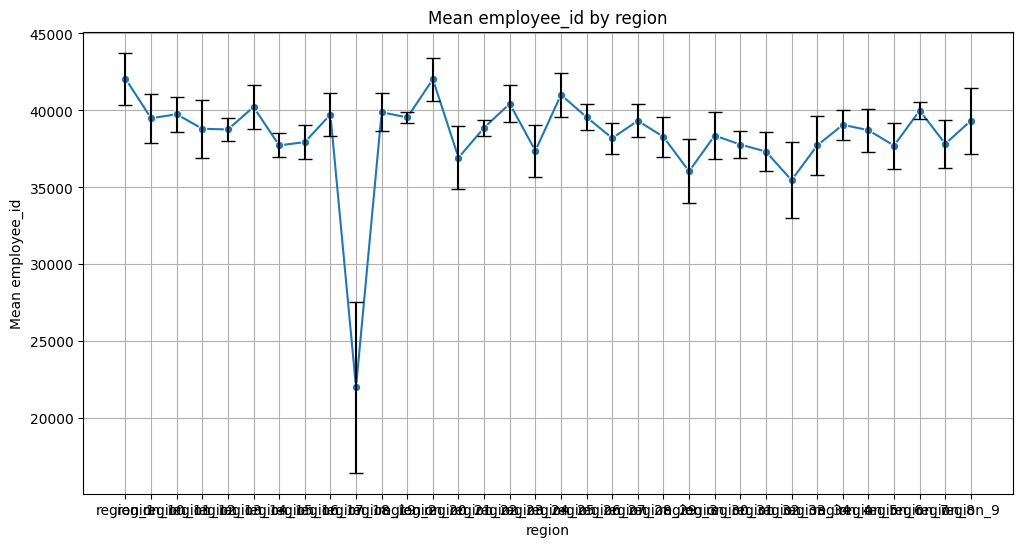

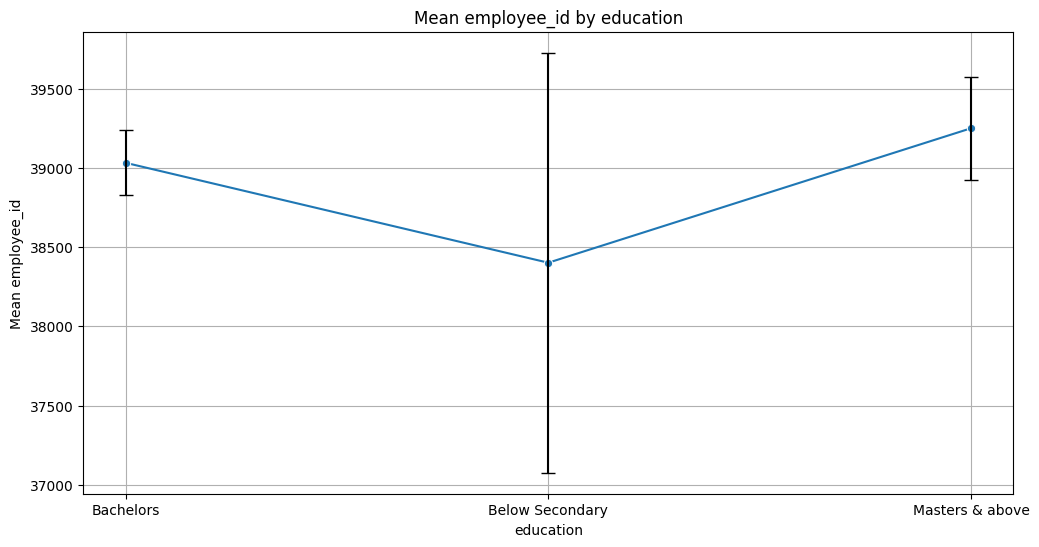

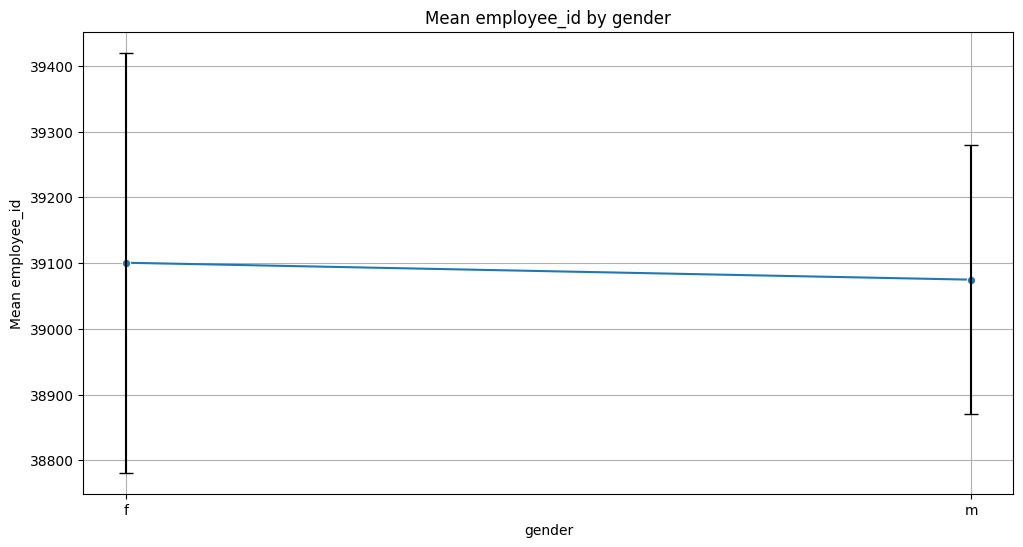

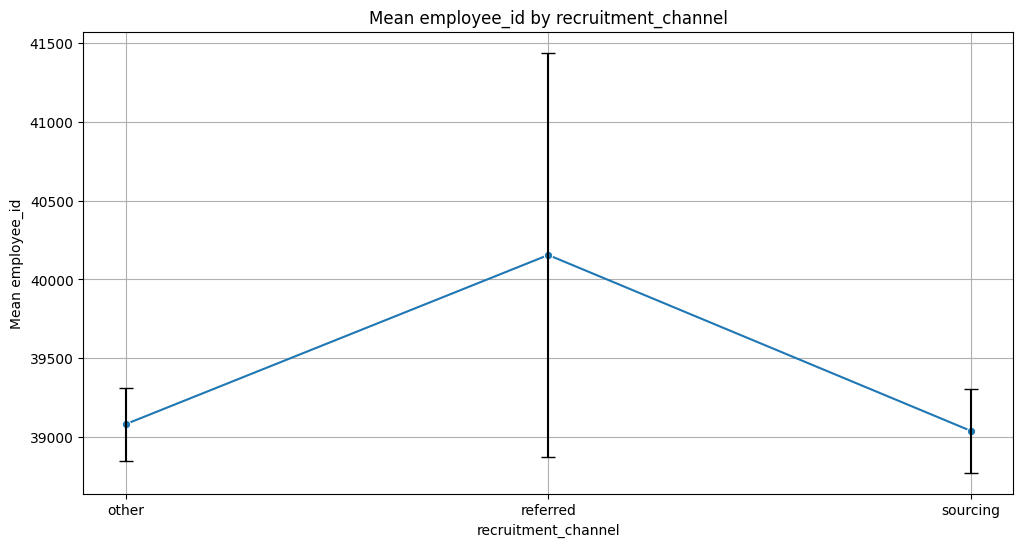

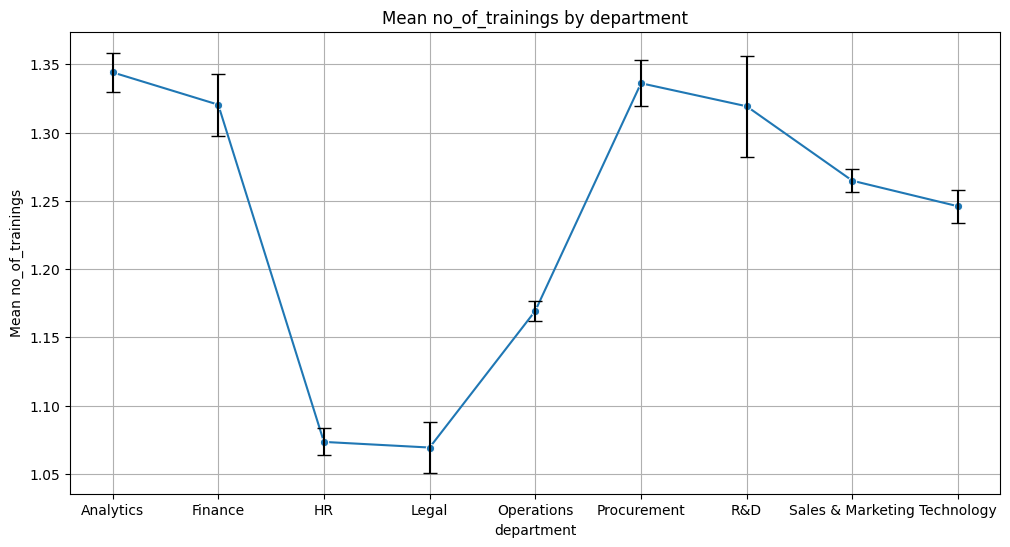

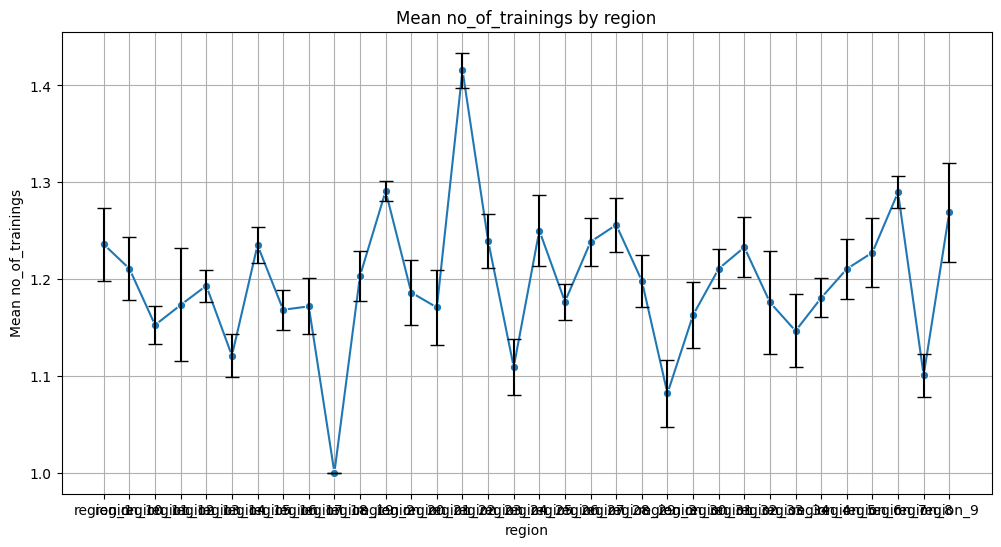

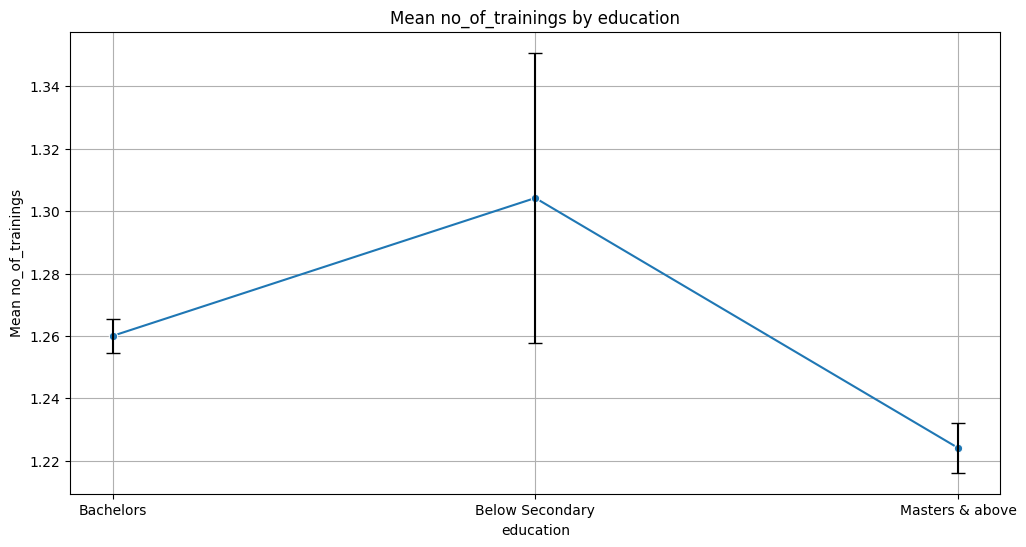

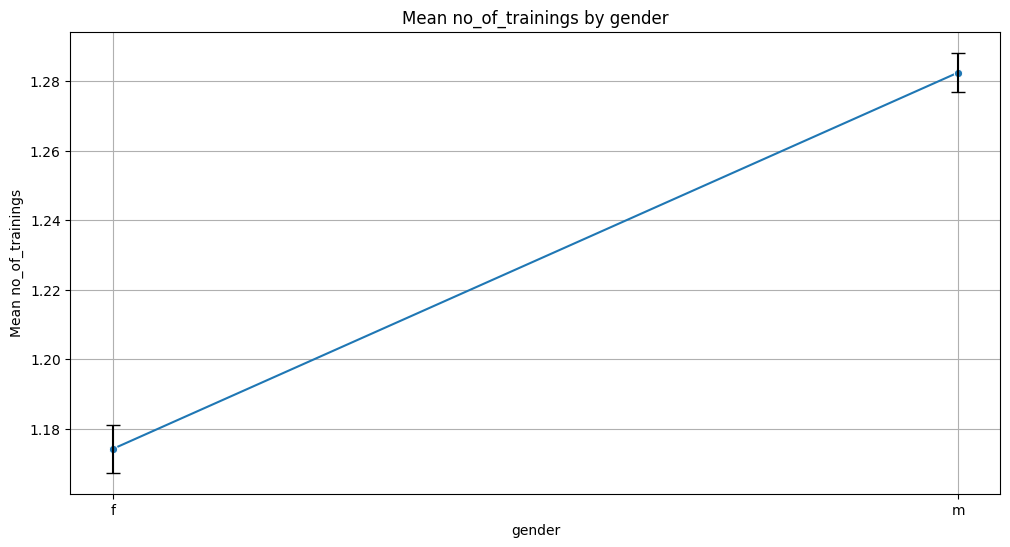

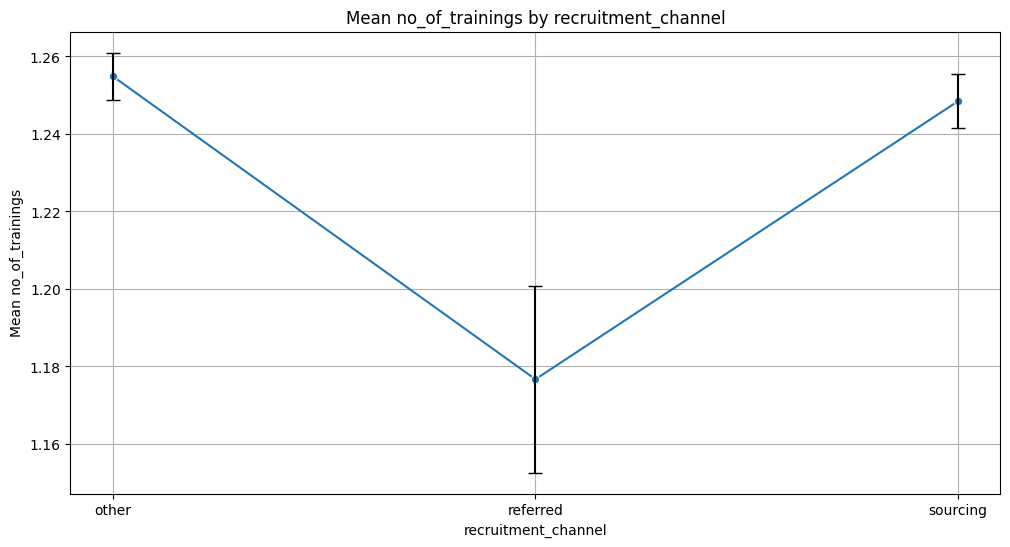

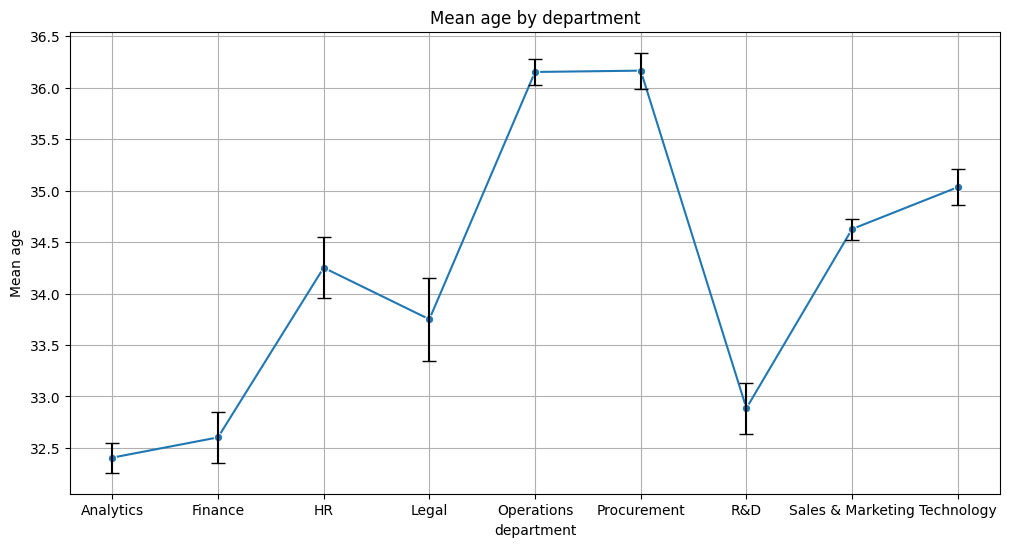

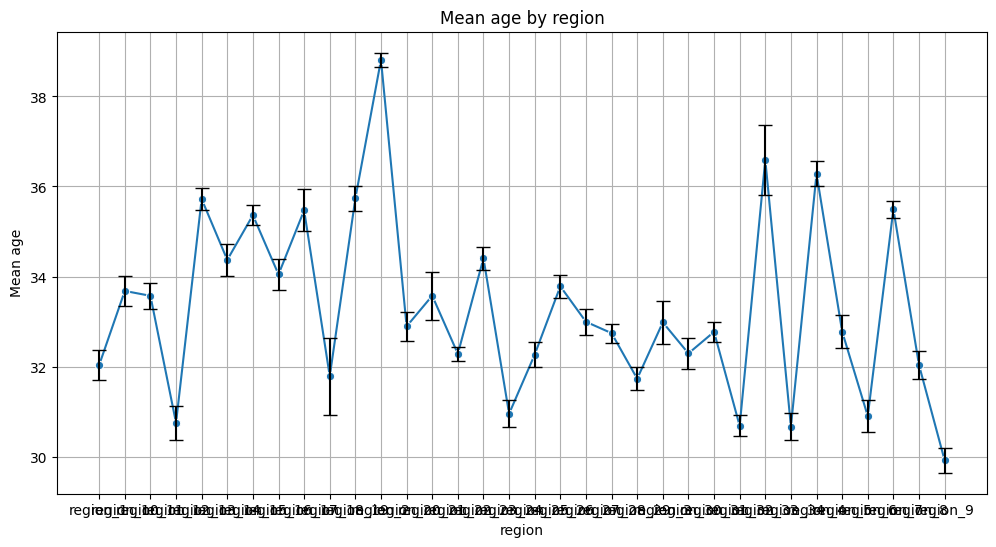

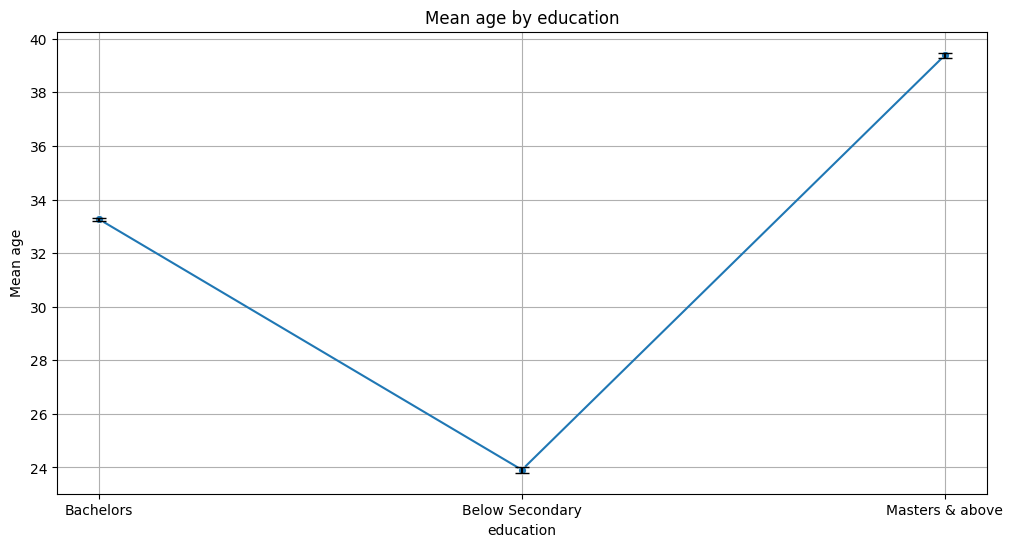

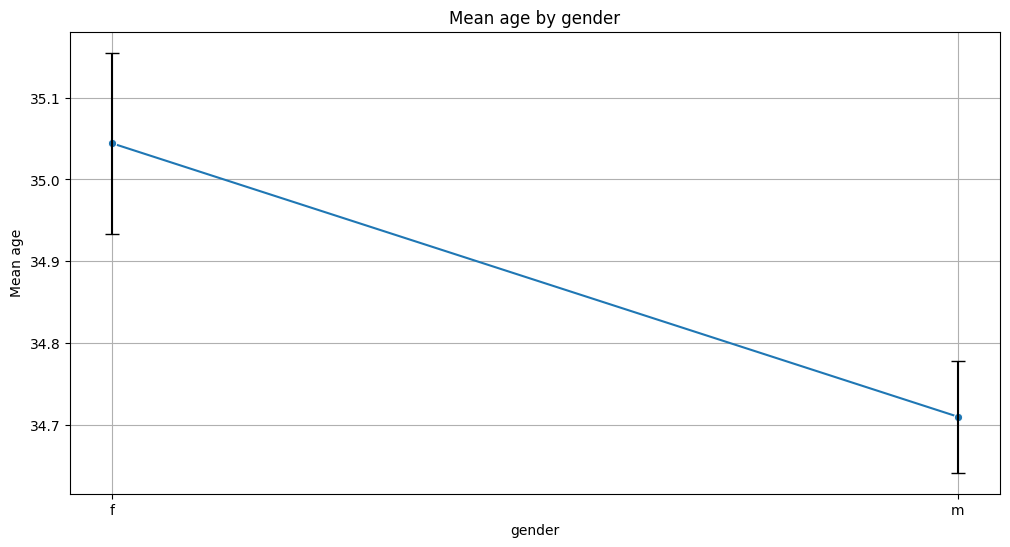

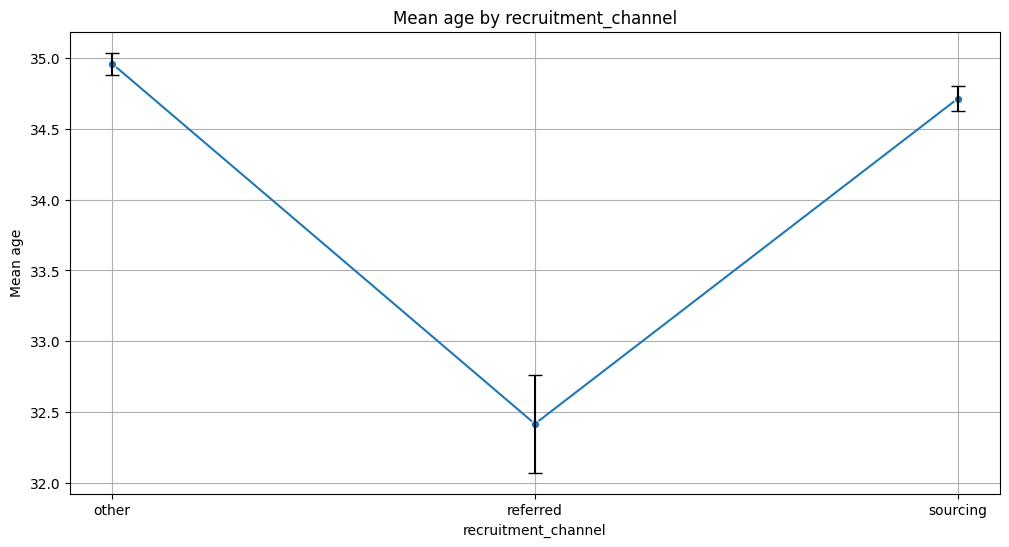

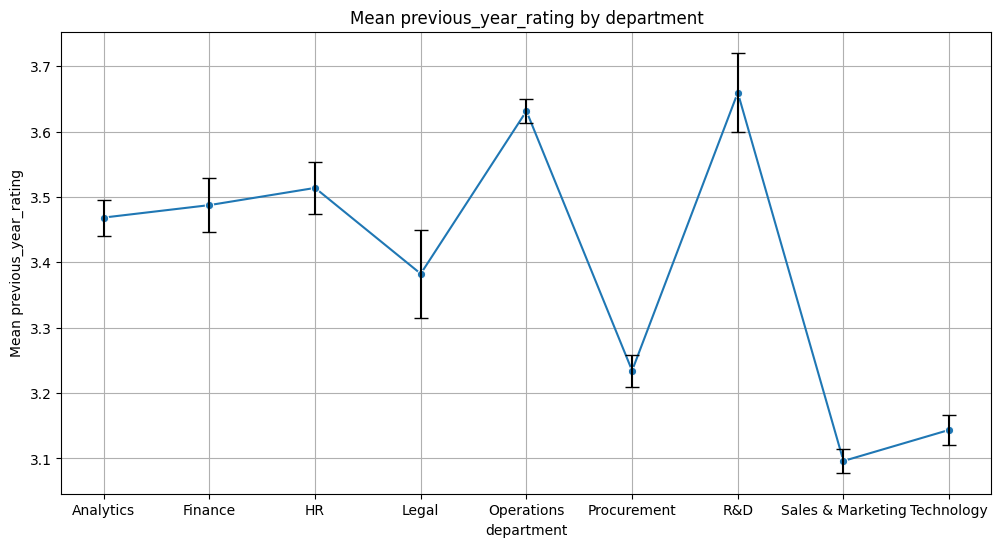

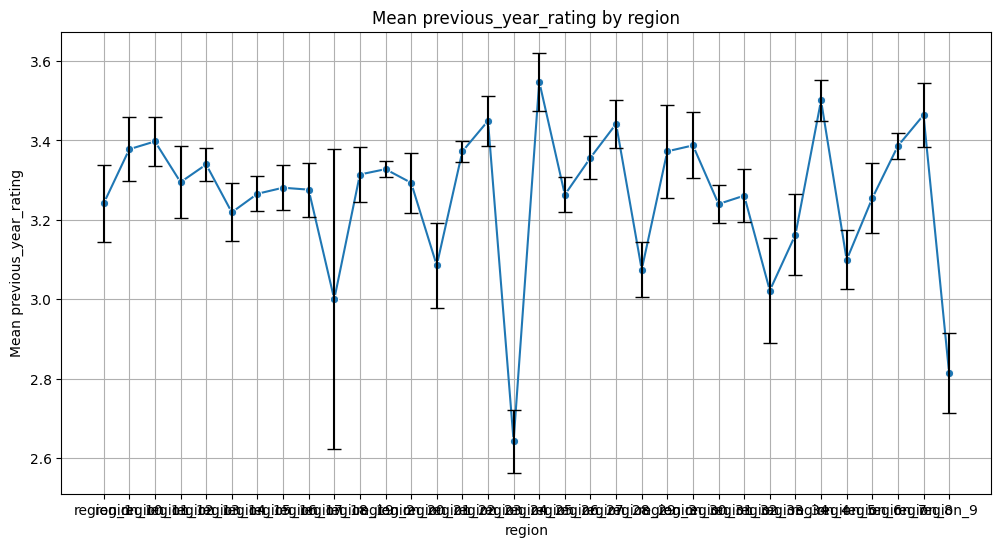

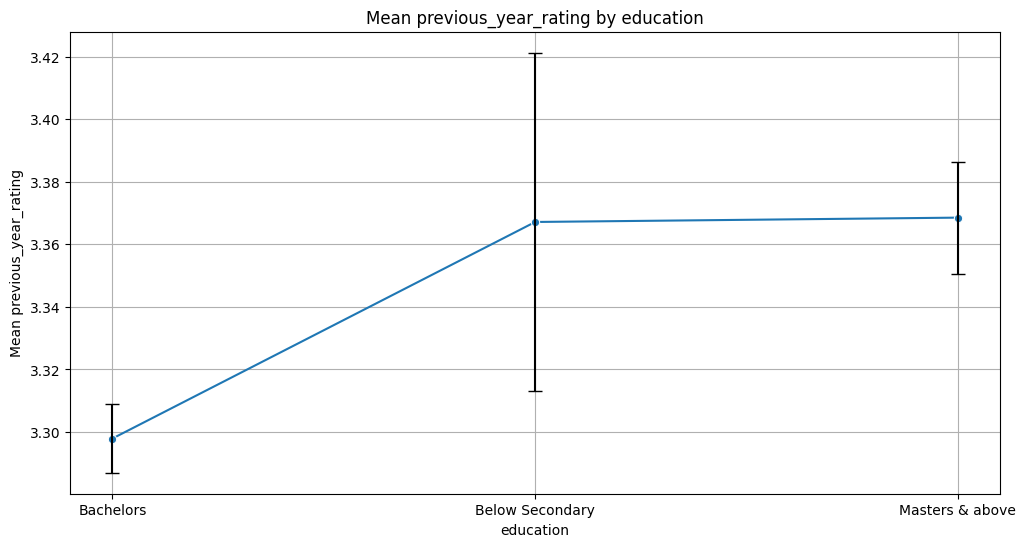

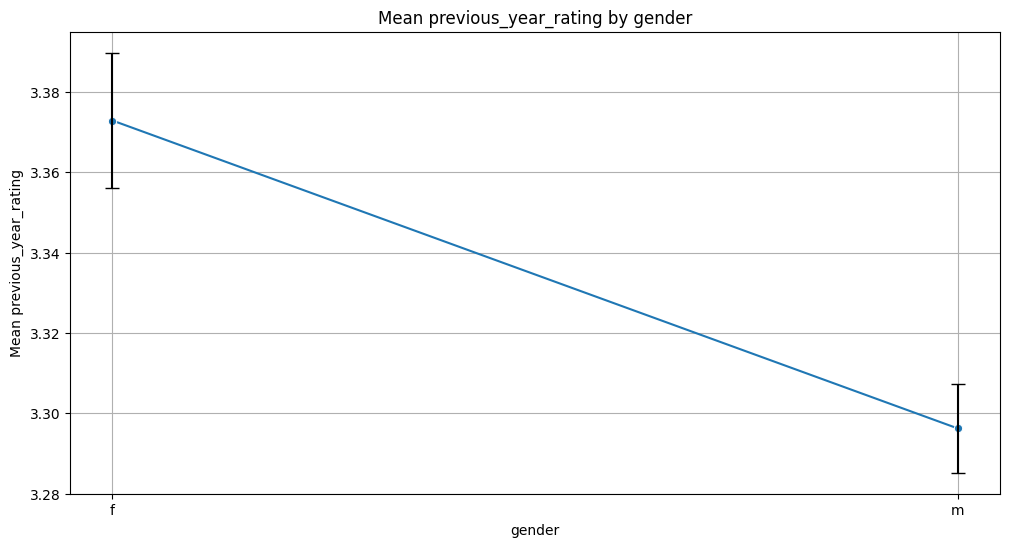

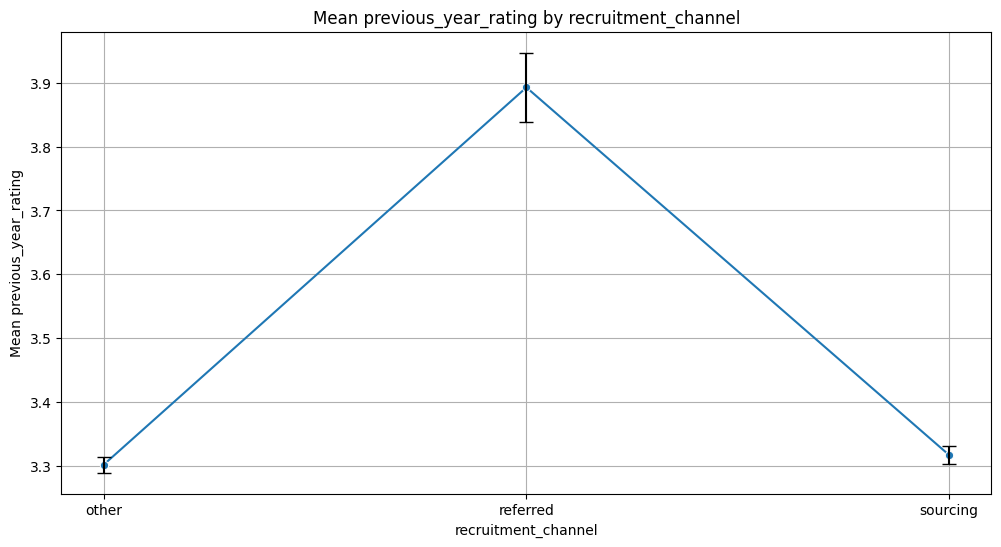

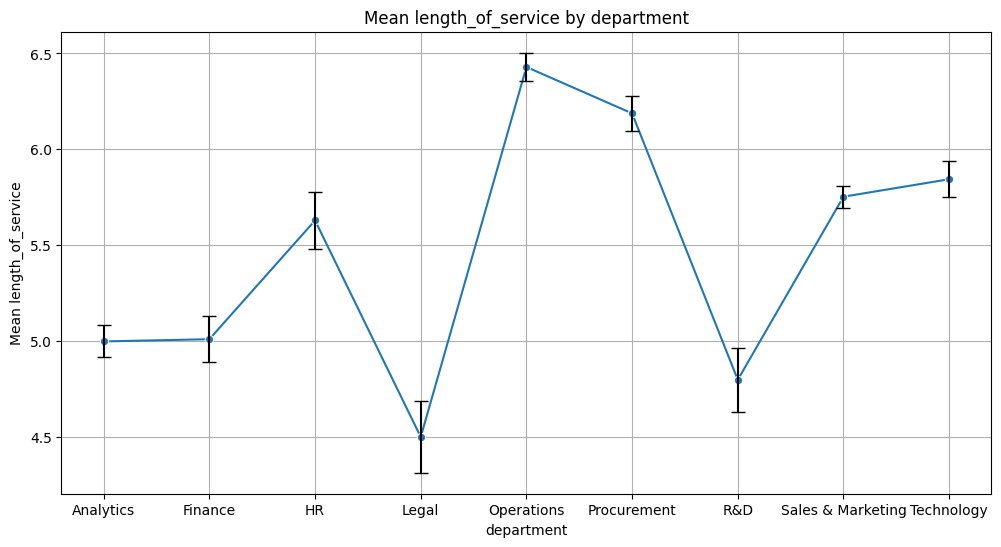

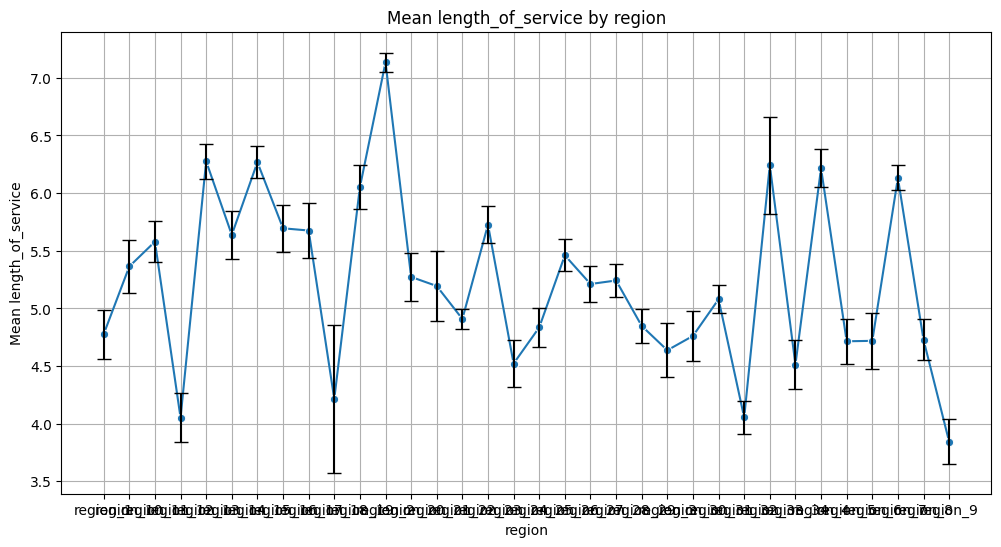

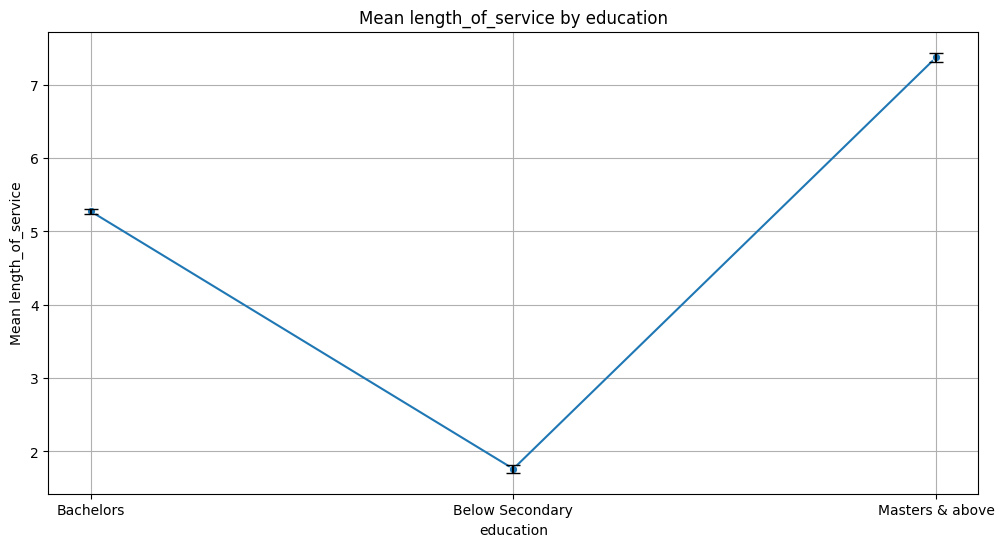

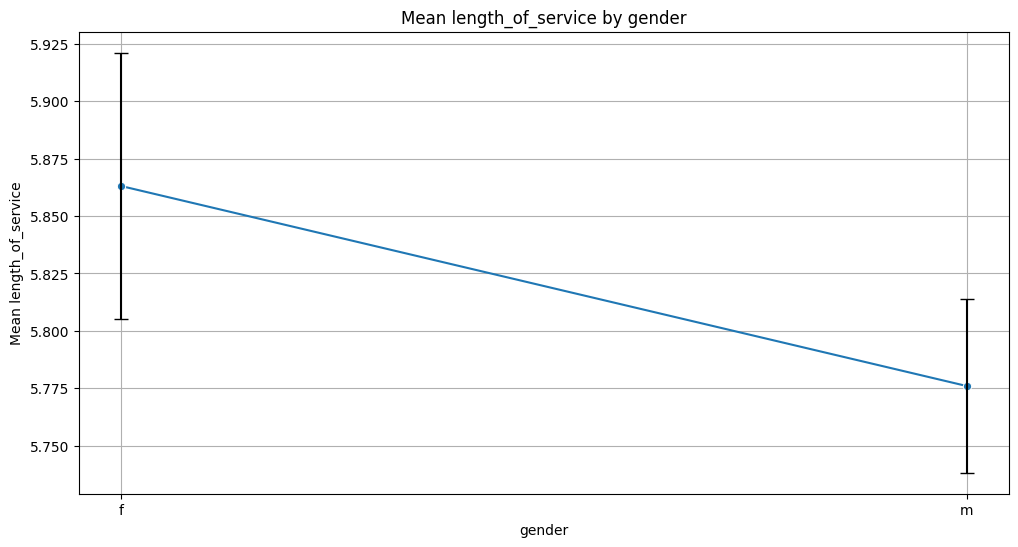

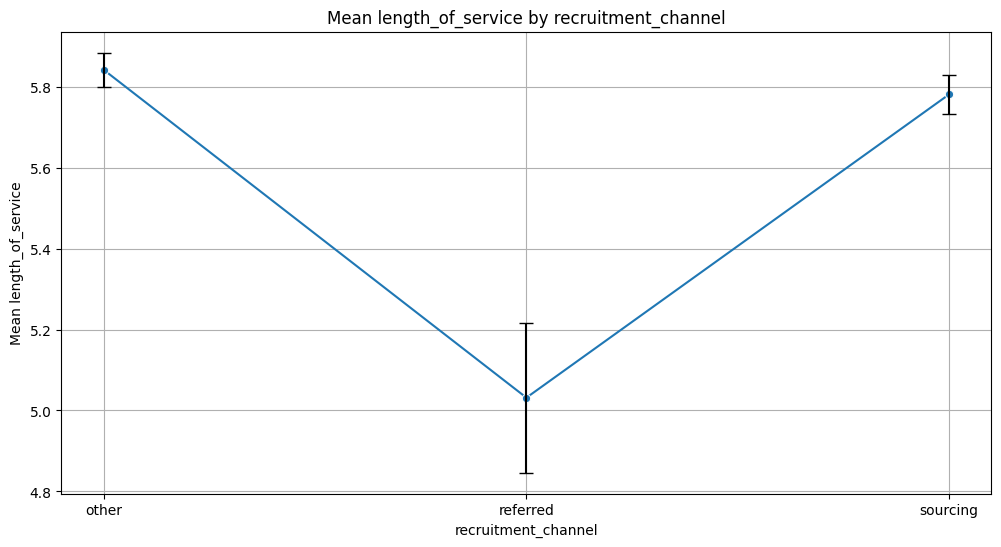

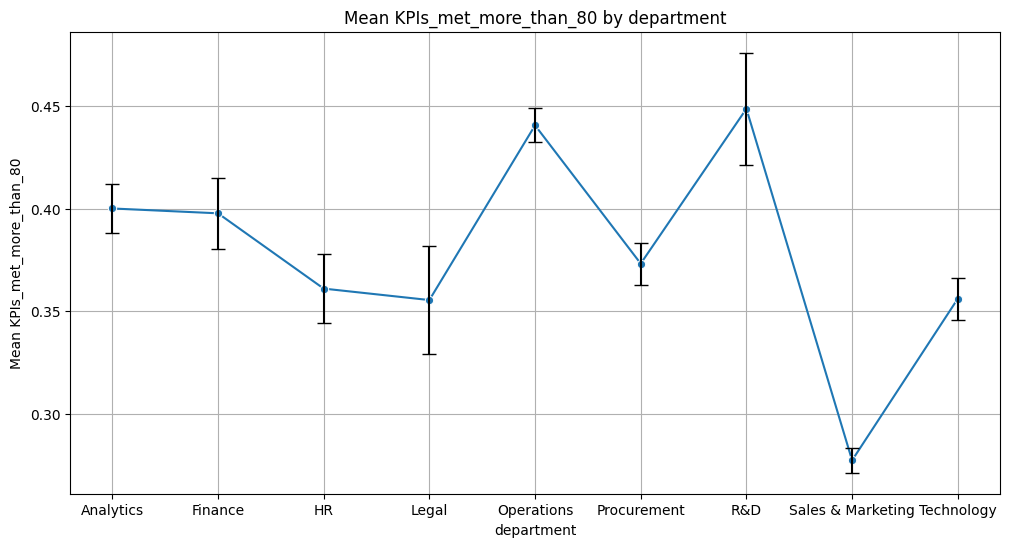

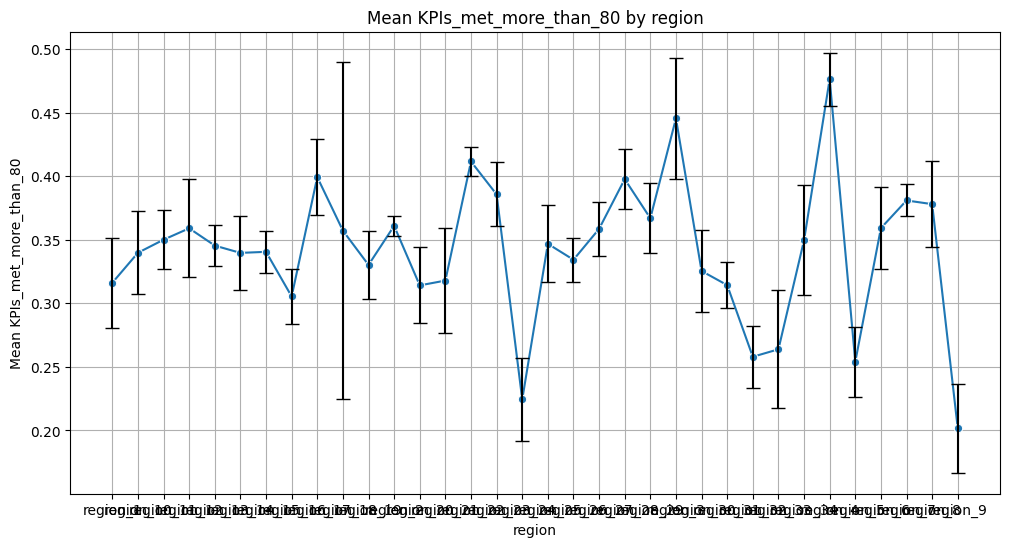

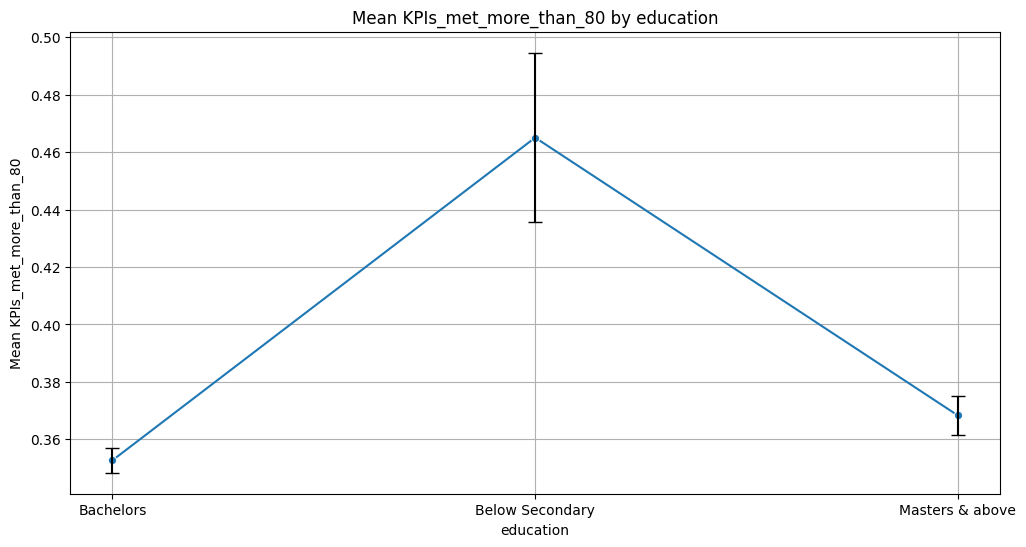

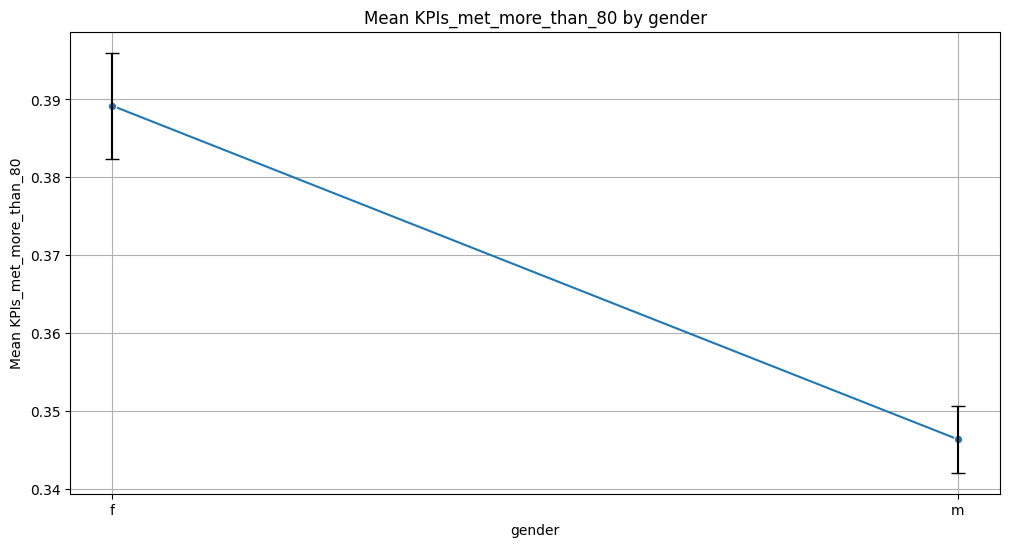

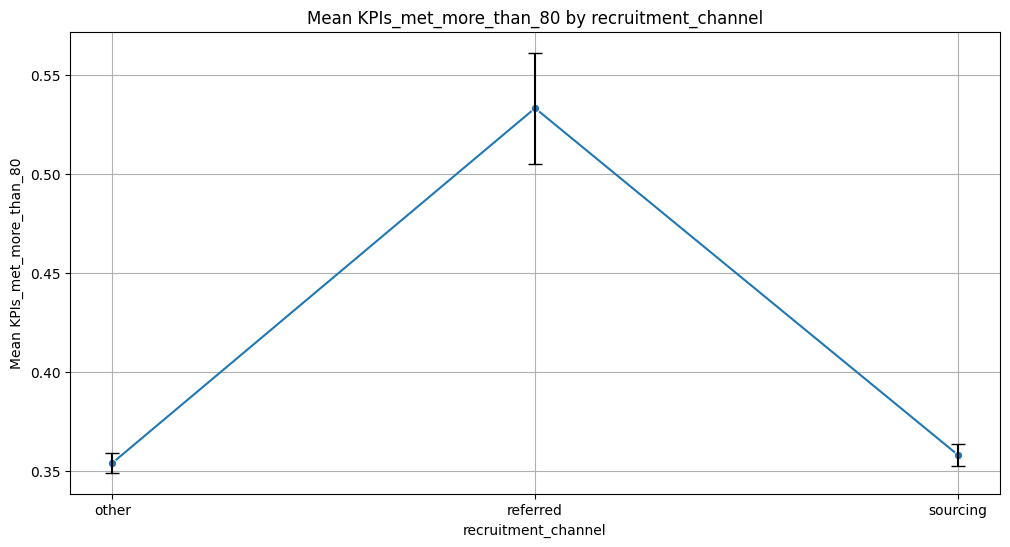

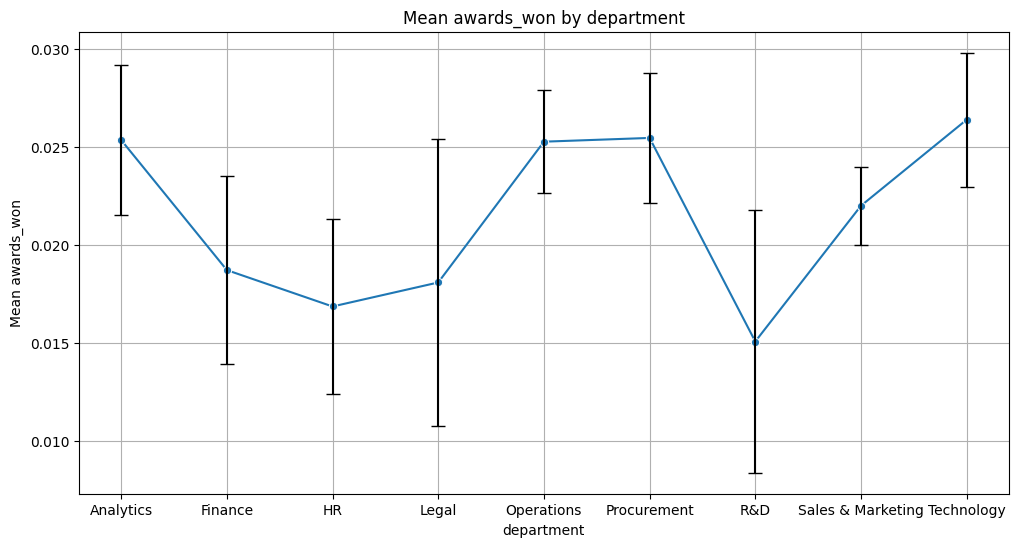

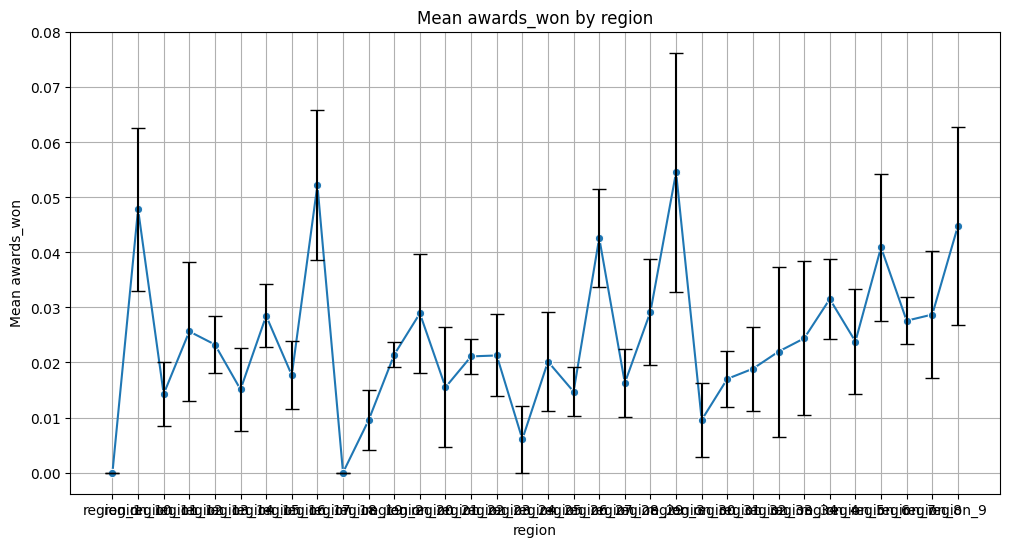

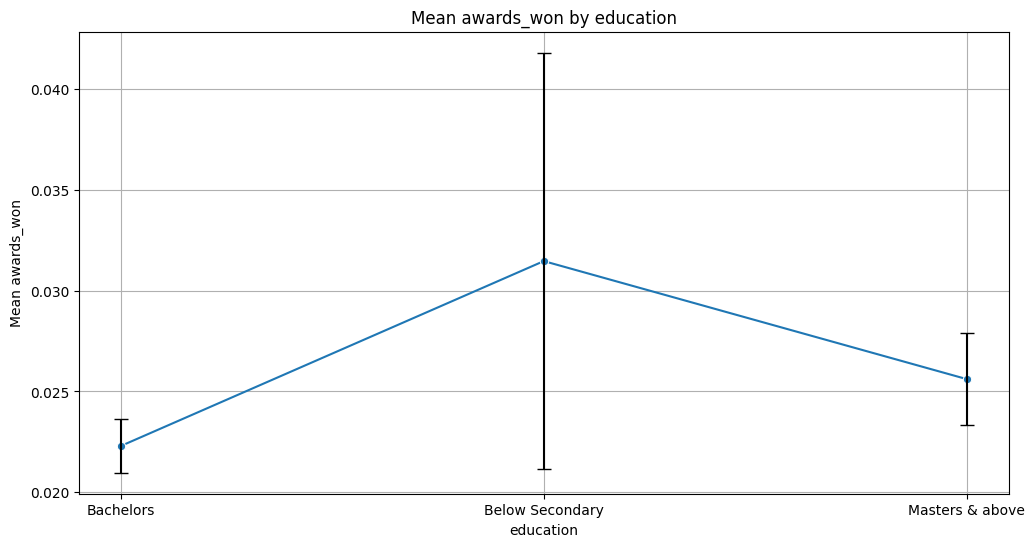

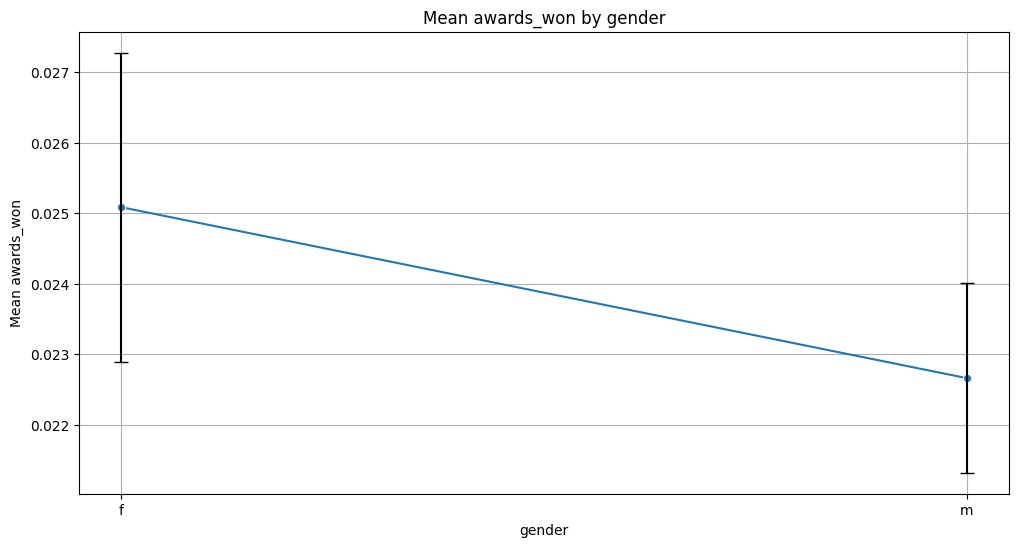

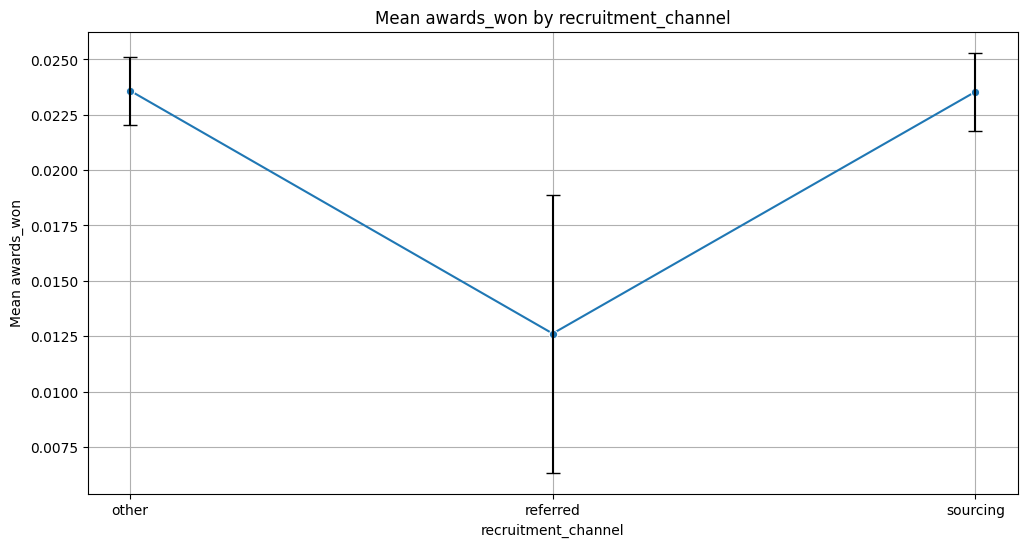

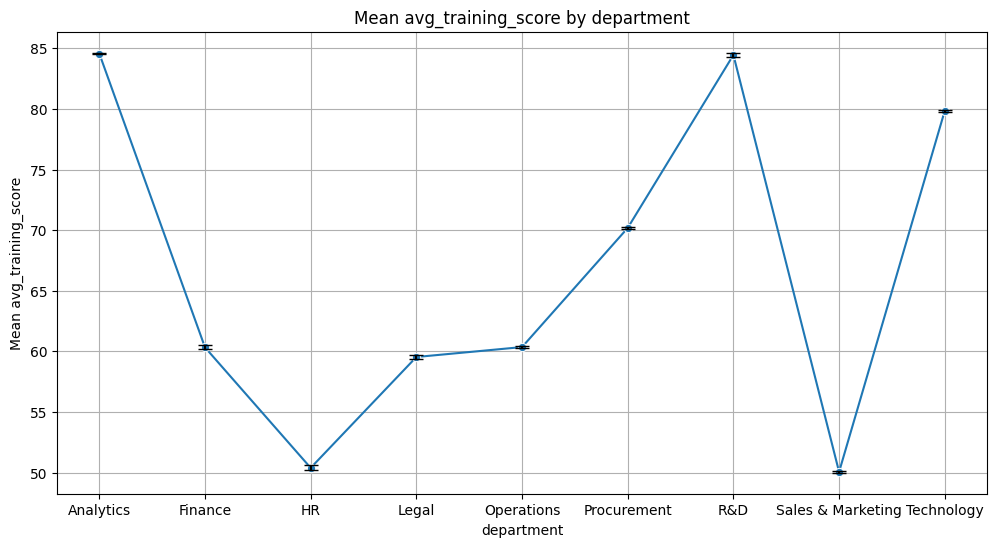

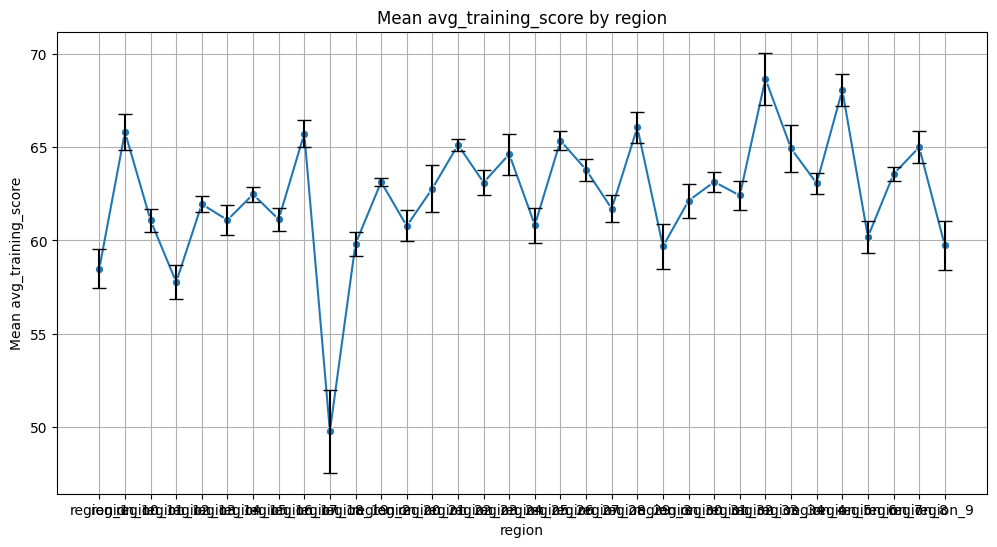

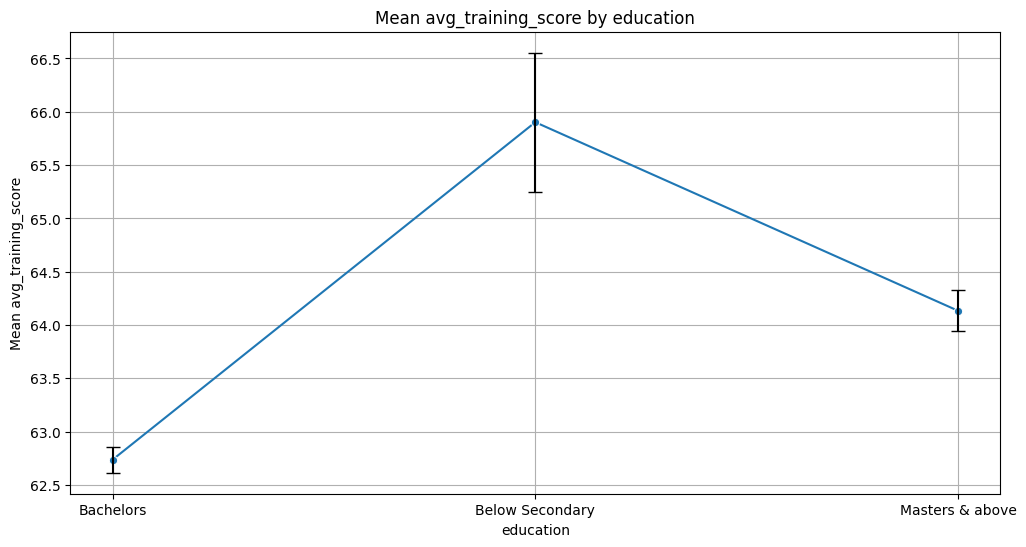

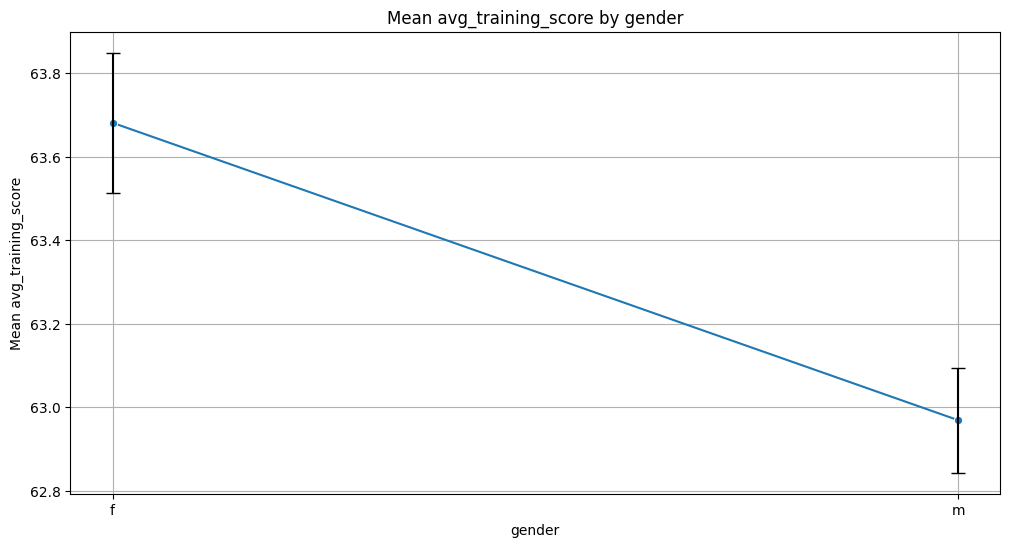

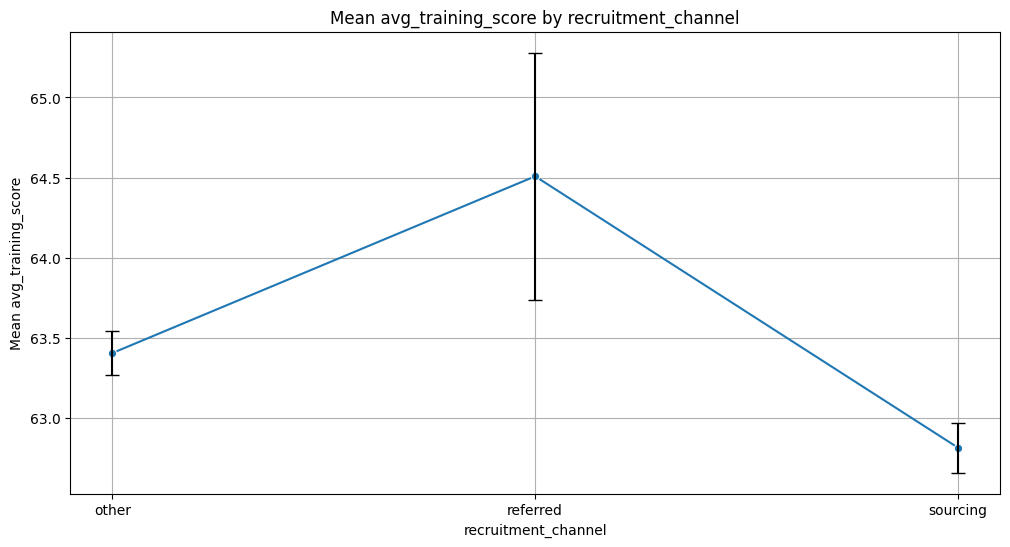

In [36]:
for num_col, cat_col in product(num_cols, cat_cols):
    # Calculate mean and standard deviation for the numerical column based on categorical variable
    summary = data.groupby(cat_col).agg(
        mean_value=(num_col, 'mean'),
        std_value=(num_col, 'std'),
        count=(num_col, 'size')
    ).reset_index()

    # Calculate standard error for error bars
    summary['std_error'] = summary['std_value'] / summary['count']**0.5

    # Plotting line chart with error bars
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=summary, x=cat_col, y='mean_value', marker='o')

    # Add error bars
    plt.errorbar(x=summary[cat_col], 
                 y=summary['mean_value'], 
                 yerr=summary['std_error'], 
                 fmt='none', 
                 c='black', 
                 capsize=5)

    # Adding titles and labels
    plt.title(f'Mean {num_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(f'Mean {num_col}')
    plt.grid()

    # Show the plot
    plt.show()

## Scroll the above graphs for all possible combos¶

In [37]:
# Constants
SAMPLE_SIZE_THRESHOLD = 30
SIGNIFICANCE_LEVEL = 0.05

# Assuming you have two lists: cat_cols (categorical) and num_cols (numerical)
# Replace `data` with your actual DataFrame
for cat_col, num_col in product(cat_cols, num_cols):
    # Drop any rows with missing values for the current pair of columns
    filtered_data = data[[cat_col, num_col]].dropna()

    # Group numerical data by the categorical column
    groups = filtered_data.groupby(cat_col)[num_col]

    # Get unique categories
    unique_categories = filtered_data[cat_col].unique()

    # Skip if there's only one category (nothing to compare)
    if len(unique_categories) < 2:
        print(f"Skipping {cat_col} - {num_col}: Less than two categories")
        continue

    # Handle binary categorical columns (T-test)
    if len(unique_categories) == 2:
        group1 = groups.get_group(unique_categories[0])
        group2 = groups.get_group(unique_categories[1])

        # Check which test to perform based on sample size
        if len(group1) > SAMPLE_SIZE_THRESHOLD and len(group2) > SAMPLE_SIZE_THRESHOLD:
            # Perform Z-test approximation using T-test
            stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            test_type = "Z-test (T-test approximation)"
        else:
            # Perform T-test
            stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            test_type = "T-test"
        
        # Print results
        print(f"{test_type} between {cat_col} and {num_col}:")
        print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")

        # Significance test
        if p_value < SIGNIFICANCE_LEVEL:
            print(f"Reject the null hypothesis (p-value < {SIGNIFICANCE_LEVEL})")
        else:
            print(f"Fail to reject the null hypothesis (p-value >= {SIGNIFICANCE_LEVEL})")

    # Handle categorical columns with more than 2 categories (ANOVA)
    else:
        # Create a list of numerical data for each category
        category_data = [group for _, group in groups]

        # Perform one-way ANOVA
        stat, p_value = stats.f_oneway(*category_data)
        test_type = "ANOVA"

        # Print results
        print(f"{test_type} between {cat_col} and {num_col}:")
        print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")

        # Significance test
        if p_value < SIGNIFICANCE_LEVEL:
            print(f"Reject the null hypothesis (p-value < {SIGNIFICANCE_LEVEL})")
        else:
            print(f"Fail to reject the null hypothesis (p-value >= {SIGNIFICANCE_LEVEL})")

    print("\n")

ANOVA between department and employee_id:
Statistic: 1.1315, p-value: 0.3380
Fail to reject the null hypothesis (p-value >= 0.05)


ANOVA between department and no_of_trainings:
Statistic: 35.0947, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between department and age:
Statistic: 57.1034, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between department and previous_year_rating:
Statistic: 72.2474, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between department and length_of_service:
Statistic: 30.9482, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between department and KPIs_met_more_than_80:
Statistic: 37.1459, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between department and awards_won:
Statistic: 0.7893, p-value: 0.6121
Fail to reject the null hypothesis (p-value >= 0.05)


ANOVA between department and avg_training_score:
Statistic: 16099.6632, p-value: 0.0000
Reject t

## Conclusions

1] The company has to work on efficiency of the employees as less employees are able to meet kpi more than 80  
2] Higher education doesnt necesarily imply the employee is better as we can see from kpi met as well as awards won  
3] The company can work on improving female:male ratio  
4] Sales and marketing is major sector for concern which has least avg in meeting the kpi of 80 which must be improved to inc the revenue  
5] There is high dependency between columns so before training a model do proper feature engineering for better results.  

# Cleaning

<Axes: xlabel='length_of_service'>

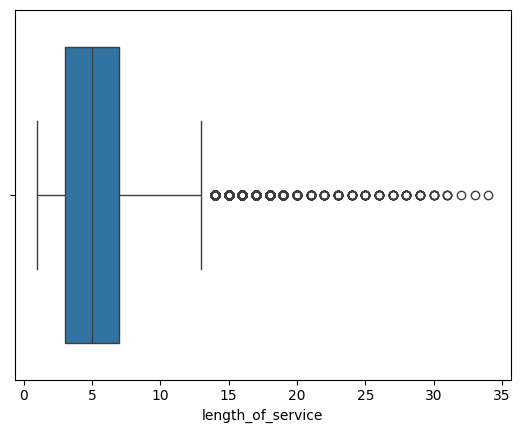

In [38]:
# lets check for outliers
sns.boxplot(data=data,x="length_of_service")

SO we have removed 1028 outliers in the data based on lenght_of_service column

# Encoding Categorical Data

In [40]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le_department = LabelEncoder()
le_region = LabelEncoder()

# Apply Label Encoding to the 'department' column
data['department_encoded'] = le_department.fit_transform(data['department'])

# Apply Label Encoding to the 'region' column
data['region_encoded'] = le_region.fit_transform(data['region'])
# Drop the original categorical columns
data = data.drop(columns=['department', 'region'])
# Display the resulting DataFrame
print(data)

       employee_id  education gender recruitment_channel  no_of_trainings  \
0             8724  Bachelors      m            sourcing                1   
1            74430  Bachelors      f               other                1   
2            72255  Bachelors      m               other                1   
3            38562  Bachelors      f               other                3   
4            64486  Bachelors      m            sourcing                1   
...            ...        ...    ...                 ...              ...   
17410        57239  Bachelors      m               other                1   
17411        73858  Bachelors      m            sourcing                2   
17412        64573  Bachelors      f            referred                2   
17413        49584  Bachelors      m               other                1   
17416        64573  Bachelors      f            referred                1   

       age  previous_year_rating  length_of_service  KPIs_met_more_than_80 

In [41]:
# one-hot encoding
data_encoded = pd.get_dummies(data, columns=['gender', 'recruitment_channel'], drop_first=True) 
# This could have also be done using sklearn
# Drop the original categorical columns
data = data.drop(columns=['gender','recruitment_channel'])
# Display the resulting DataFrame
print(data_encoded)

       employee_id  education  no_of_trainings  age  previous_year_rating  \
0             8724  Bachelors                1   24                   3.0   
1            74430  Bachelors                1   31                   3.0   
2            72255  Bachelors                1   31                   1.0   
3            38562  Bachelors                3   31                   2.0   
4            64486  Bachelors                1   30                   4.0   
...            ...        ...              ...  ...                   ...   
17410        57239  Bachelors                1   42                   3.0   
17411        73858  Bachelors                2   28                   2.0   
17412        64573  Bachelors                2   30                   5.0   
17413        49584  Bachelors                1   33                   1.0   
17416        64573  Bachelors                1   35                   5.0   

       length_of_service  KPIs_met_more_than_80  awards_won  \
0           

In [44]:
data.education.unique()

array(['Bachelors', 'Masters & above', 'Below Secondary'], dtype=object)

In [49]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Define the order of education levels (from lowest to highest)
education_levels = ['Below Secondary','Bachelors', 'Masters & above']
# Initialize the OrdinalEncoder with the specified categories
ordinal_encoder = OrdinalEncoder(categories=[education_levels])
# Apply ordinal encoding to the education column
data_encoded['education_encoded'] = ordinal_encoder.fit_transform(data_encoded[['education']])
data_encoded.drop(columns=["education"],inplace=True)
# Display the DataFrame with the encoded column
print(data_encoded)

       employee_id  no_of_trainings  age  previous_year_rating  \
0             8724                1   24                   3.0   
1            74430                1   31                   3.0   
2            72255                1   31                   1.0   
3            38562                3   31                   2.0   
4            64486                1   30                   4.0   
...            ...              ...  ...                   ...   
17410        57239                1   42                   3.0   
17411        73858                2   28                   2.0   
17412        64573                2   30                   5.0   
17413        49584                1   33                   1.0   
17416        64573                1   35                   5.0   

       length_of_service  KPIs_met_more_than_80  awards_won  \
0                      1                      1           0   
1                      5                      0           0   
2                 

# now our data is ready to be passsed to ML model.

# For better results, do proper feature engineering